# Proyecto Final
- Mathias Berg
- Camilo Cornejo
- Camila Oliva

#1 - Introducción

Una entidad financiera tiene altos niveles de fuga voluntaria de clientes. Se solicita desarrollar un modelo predictivo que identifique tempranamente a clientes propensos a fugarse, además de definir politicas comerciales para retener a los clientes potencialmente fugitivos.

En la Tabla 1, se cuenta con los beneficios y costos económicos de acertar o errar en las predicciones.
<img src="https://drive.google.com/uc?export=view&id=1E7-_jLEj4OuOKlJdo_sumtWpkBg0St0u" width="400">

Las primeras interrogantes a contestar son las siguientes:


1.   ¿Que hacer para que estos clientes no se fuguen?\
Se deben realizar acciones comerciales con los clientes potencialmente fugitivos.
2.   ¿Cuales son las acciones comerciales que  deberíamos emprender con estos clientes?\
Las acciones comerciales deben ser incentivos economicos para retener a los clientes.\
3. ¿Se deben aplicar estas medidas a todos los clientes?\
Se deben identificar a los clientes por medio de un modelo predictivo y solo aplicar las estrategias comerciales a los clientes clasificados como potencialmente fugitivos.

Para abordar la problematica presentada, se utilizará como metodología al proceso KDD. 
<img src="https://drive.google.com/uc?export=view&id=1FbqpARJ8rLkZBAhBh3sAoOV2D10NBxhU" width="600">

En particular se busca responder a los siguientes puntos:
1. Indicar qué problemas detecta en la base de datos y medidas para corregirlos. Debe indicar el procedimiento
que siguió para resolverlos de forma clara y precisa.
2. Realizar un análisis descriptivo de los datos. En este punto deben calcular las principales métricas estadísticas
para una mejor descripción de los datos, por ejemplo, estadísticas descriptivas, tablas de frecuencia, etc. Apoye su
análisis utilizando gráficos.
3. Transformar datos y generar indicadores: transforme las variables disponibles de forma de encontrar nuevas
variables, generadas a partir de las originales, que puedan tener un buen desempeño predictivo a partir de sus
conocimientos del negocio.
4. Seleccionar atributos: analice sus variables de la base. ¿Discriminan entre clientes fugados y no fugados?.
5. Modelación de Minería de Datos: entrene al menos 3 modelos predictivos. Algunos candidatos son: regresión
logística, k-vecinos más cercanos, árboles de decisión y SVM, no obstante, también puede utilizar modelos cuya
implementación no hayamos visto en el programa. Describa el proceso de validación y selección del modelo para
cada caso. Describa las soluciones encontradas en términos de las variables presentes y coeficientes. Aplique este
modelo al conjunto de datos de predicción

## 1.1 Objetivo general

Desarrollar un modelo predictivo que pueda identificar que clientes son mas propensos a fugarse, para luego proponer acciones comerciales que permita la retención de estos clientes.

## 1.2 Objetivo especifico

* Realizar analisis descriptivo
* Preprocesar los datos
* Seleccionar un modelo de aprendizaje
* Definir acciones comerciales de retención

#2 - Analisis exploratario de los datos

In [74]:
#Importación de la librería a utilizar
# manejo de datos
import numpy as np
import pandas as pd

# hay algunos warnings en la sección de "Desbalance de clases", con estas lineas los omitimos
import warnings
warnings.filterwarnings("ignore")

# imputación de datos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# transformación
from sklearn.preprocessing import MinMaxScaler

# seleccion de modelos
from sklearn.model_selection import cross_val_score
from sklearn import model_selection 
# metricas
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', palette='pastel')

# Leer los datos
df_gral = pd.read_csv("https://raw.githubusercontent.com/camilenco/ProyectoBI/main/20211216182637BF5E72C262240F__BASEFUGA_GENERAL.csv")
df_pred = pd.read_csv("https://raw.githubusercontent.com/camilenco/ProyectoBI/main/20211218141814F01C9E565D7170__BASEFUGA_PREDICCION.csv")
df_gral.head()

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,1,M,746476,39.0,MED,CAS,68,213.0,LOS ANGELES,0,38292,0,434357,1766,9110,340,2,2000000,NO,NO FUGA
1,2,F,11901,49.0,MED,VIU,16,89.0,SANTIAGO,0,0,0,0,48,0,0,1,7500000,SI,NO FUGA
2,3,M,1651421,39.0,TEC,CAS,90,16.0,ANTOFAGASTA,0,604169,0,0,323,26489,2925,1,8000000,NO,NO FUGA
3,4,F,638969,36.0,UNV,CAS,85,115.0,SANTIAGO,0,5125,0,198998,94,0,105,1,2600000,NO,NO FUGA
4,5,M,860113,44.0,TEC,CAS,45,80.0,SANTIAGO,0,11946,0,73959,149,0,272,1,6400000,NO,NO FUGA


In [ ]:
df_gral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2294 non-null   int64  
 1   GENERO        2283 non-null   object 
 2   RENTA         2294 non-null   int64  
 3   EDAD          2292 non-null   float64
 4   NIV_EDUC      2283 non-null   object 
 5   E_CIVIL       2283 non-null   object 
 6   COD_OFI       2294 non-null   int64  
 7   COD_COM       2291 non-null   float64
 8   CIUDAD        2291 non-null   object 
 9   D_Marzo       2294 non-null   int64  
 10  D_Abril       2294 non-null   int64  
 11  D_Mayo        2294 non-null   int64  
 12  D_Junio       2294 non-null   int64  
 13  D_Julio       2294 non-null   int64  
 14  D_Agosto      2294 non-null   int64  
 15  D_Septiembre  2294 non-null   int64  
 16  M_MOROSO      2294 non-null   int64  
 17  MONTO         2294 non-null   int64  
 18  SEGURO        2294 non-null 

Descripción de las variables:

**Variables Categóricas:** 
* Genero: genero del cliente
* NIV_Educ: nivel educacional
* E_Civil: estado civil
* Ciudad: ciudad de la oficina
* Seguro: seguro de gravamen
* Fuga: variable objetivo
* COD_Ofi: código de la oficina
* COD_Com: código de la comuna
* ID: identificador del cliente

**Variables Continuas:**
* Renta: renta en pesos
* Edad: edad en años
* D_Marzo: deuda de Marzo
* D_Abril: deuda de Abril
* D_Mayo: deuda de Mayo
* D_Junio: deuda de Junio
* D_Julio: deuda de Julio
* D_Agosto: deuda de Agosto
* D_Septiembre: deuda de Septiembre
* M_Moroso: meses en mora
* Monto: monto crédito preaprobado

In [ ]:
df_gral.describe().round(2)

,ID,RENTA,EDAD,COD_OFI,COD_COM,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO
count,2294.00,2294.00,2292.00,2294.00,2291.00,2294.00,2294.00,2294.00,2294.00,2294.00,2294.00,2294.00,2294.00,2294.00
mean,1147.50,852756.27,43.55,68.54,107.95,153020.64,272681.03,103231.53,189976.06,566.85,3578.76,1940.64,1.25,3477092.41
std,662.37,1379715.21,8.88,40.16,84.77,498187.54,402325.69,870698.44,670504.23,1075.33,8942.38,9868.82,0.75,2292933.05
min,1.00,176.00,-50.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,500000.00
25%,574.25,100381.50,39.00,31.00,80.00,0.00,17674.25,0.00,0.00,7.00,0.00,0.00,1.00,1700000.00
50%,1147.50,369934.50,44.00,56.00,90.00,0.00,134474.50,0.00,5502.00,146.00,0.00,56.00,1.00,2600000.00
75%,1720.75,826758.25,50.00,92.00,118.00,0.00,374425.00,0.00,174906.00,629.75,1486.25,497.25,2.00,4800000.00
max,2294.00,8454317.00,130.00,155.00,516.00,9458161.00,5495534.00,18396961.00,20634612.00,11187.00,88837.00,249652.00,3.00,8000000.00


##2.1 Variable "Fuga"

Existe un 49,6% de clientes que se fugó

NO FUGA    1157
FUGA       1137
Name: FUGA, dtype: int64

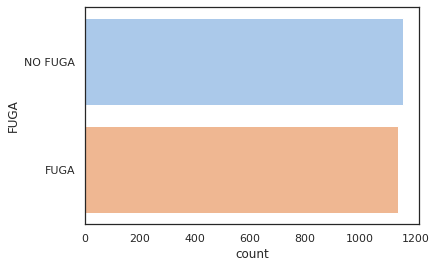

In [ ]:
sns.countplot(y='FUGA', data=df_gral)
df_gral['FUGA'].value_counts()

##2.2 Variable "Genero"

El 69% y 20% del genero masculino y femenino respectivamente se fugan.

ID
               count
FUGA    GENERO      
FUGA    F        179
        M        955
NO FUGA F        719
        M        430

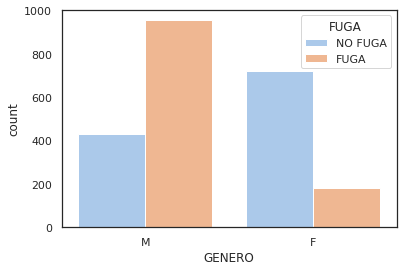

In [ ]:
sns.countplot(x='GENERO', hue='FUGA', data=df_gral)
df_gral.groupby(['FUGA', 'GENERO'])[['ID']].agg(['count'])


##2.3 Variable "Nivel Eduacacional"

El mayor porcentaje (65%) de los clientes que se fugan  tienen un nivel educacional Universitario.

El mayor porcentaje (48%) de los clientes que  no se fugan  tienen un nivel educacional Tecnico.


ID
                 count
FUGA    NIV_EDUC      
FUGA    BAS          4
        MED        261
        TEC        136
        UNV        731
NO FUGA BAS          7
        EUN         12
        MED        354
        TEC        562
        UNV        216

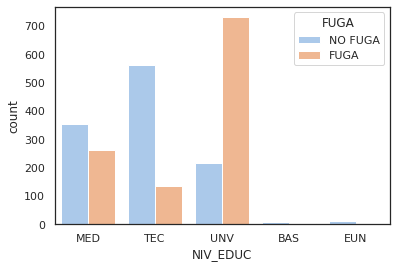

In [ ]:
sns.countplot(x='NIV_EDUC', hue='FUGA', data=df_gral)
df_gral.groupby(['FUGA', 'NIV_EDUC'])[['ID']].agg(['count'])

##2.4 Variable "Estado civil"

Los clientes casados tienen el mayor porcentaje de fuga (76%)

ID
                count
FUGA    E_CIVIL      
FUGA    CAS       856
        SEP        61
        SOL       200
        VIU        13
NO FUGA CAS       573
        SEP        53
        SOL       442
        VIU        85

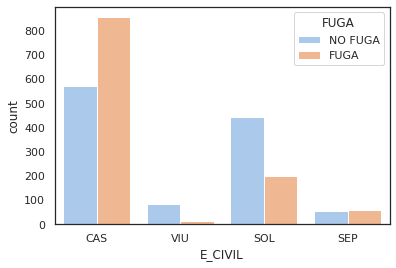

In [ ]:
sns.countplot(x='E_CIVIL', hue='FUGA', data=df_gral)
df_gral.groupby(['FUGA','E_CIVIL'])[['ID']].agg(['count'])


##2.5 Variable "Seguro de gravamen"

La gran mayoria de los clientes no posee seguro de gravamen. En especifico, los clientes que no tienen el seguro, tienen tendencia a fugarse.

ID
               count
FUGA    SEGURO      
FUGA    NO       938
        SI       199
NO FUGA NO       878
        SI       279

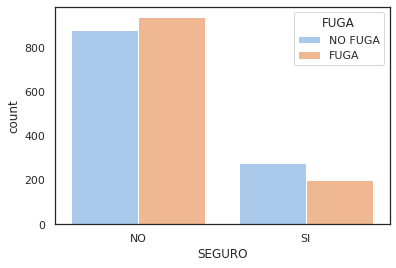

In [ ]:
sns.countplot(x='SEGURO', hue='FUGA', data=df_gral)
df_gral.groupby(['FUGA','SEGURO'])[['ID']].agg(['count'])

##2.6 Variable "Ciudad"

El mayor numero de fugados se encuentran en las ciudades de Santiago, Arica y Concepción

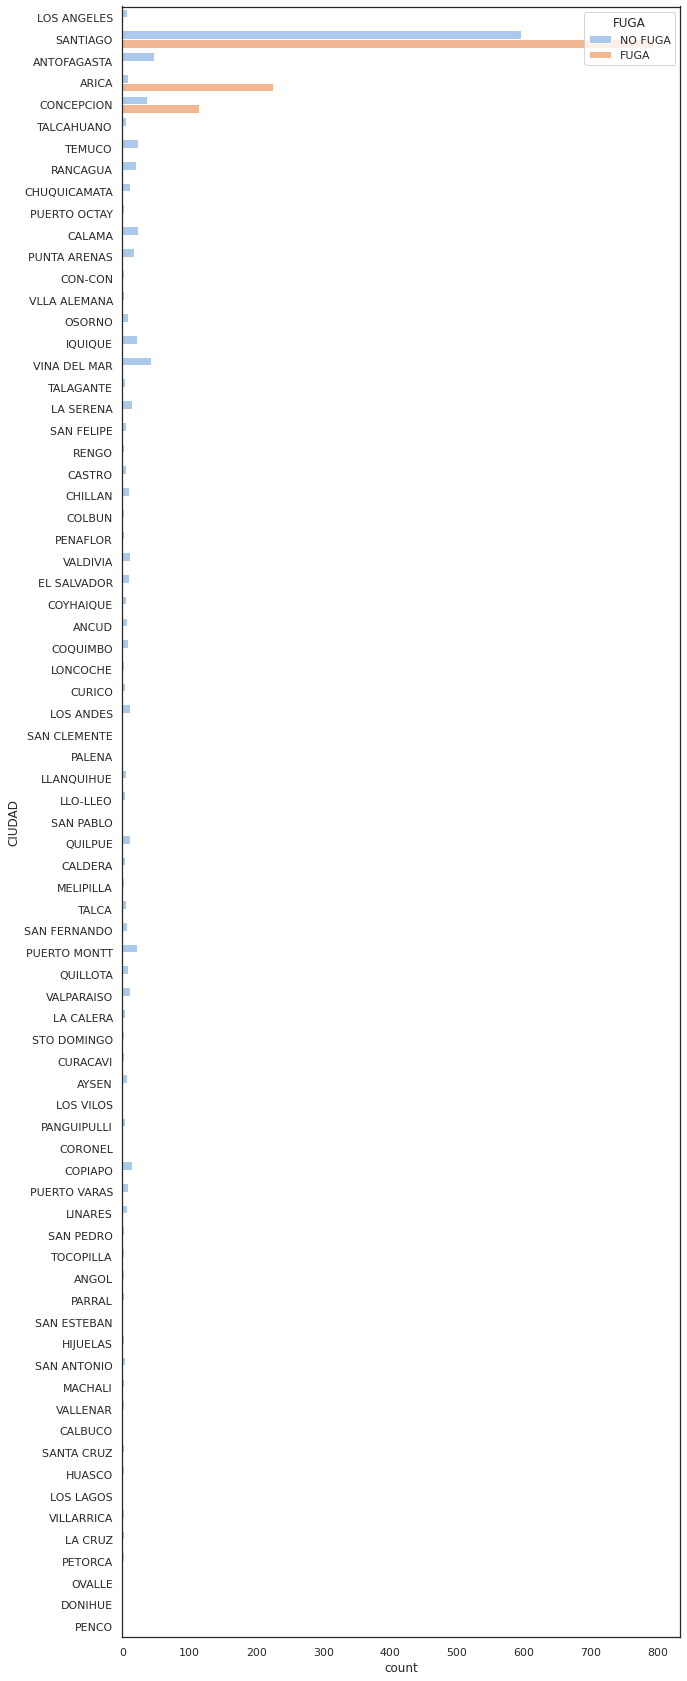

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,30))
sns.countplot(y='CIUDAD', hue='FUGA',data=df_gral)

##2.7 Variable "Codigo de la oficina"

Es notorio que existen oficinas donde el numero de fugas es muy por encima que las otras oficinas del país, como por ejemplo las oficinas 27, 31, 55 y 138.

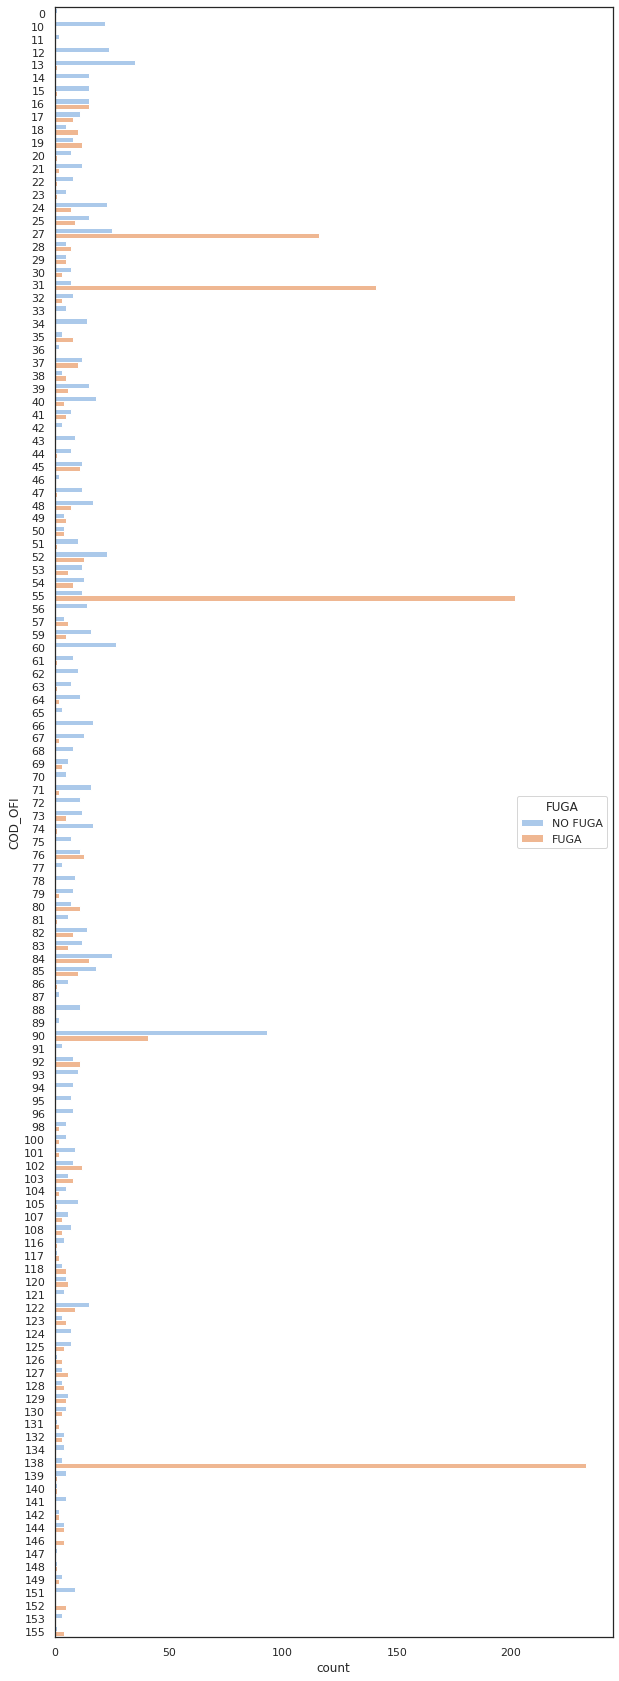

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,30))
sns.countplot(y='COD_OFI', hue='FUGA',data=df_gral)

##2.8 Variables continuas


Text(0.5, 1.0, 'Box-plot D_Septiembre')

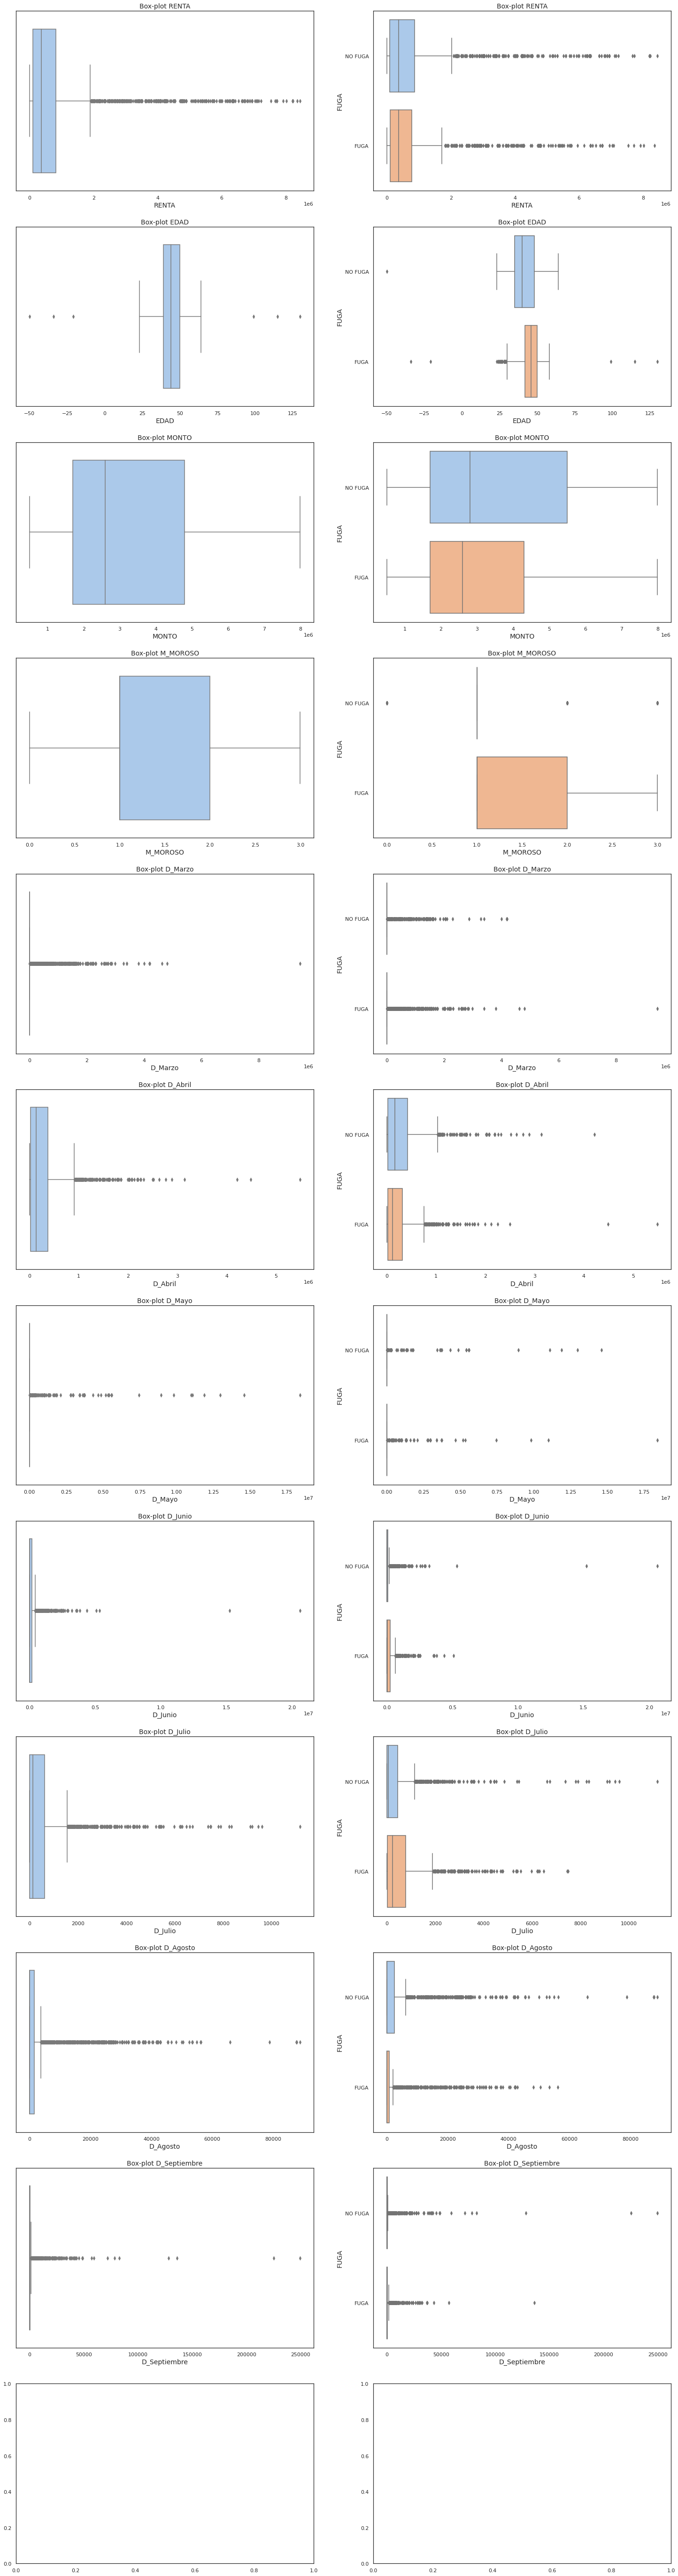

In [ ]:
fig, axes = plt.subplots(12,2,figsize=(25,100))

# gráficos fila 1
a1 = sns.boxplot(x='RENTA', data=df_gral, palette='pastel', ax=axes[0,0])
a1.set_xlabel('RENTA',fontsize=14)
a1.set_title('Box-plot RENTA',fontsize=14)

a2 = sns.boxplot(x='RENTA', y='FUGA', data=df_gral, palette='pastel', ax=axes[0,1])
a2.set_ylabel('FUGA',fontsize=14)
a2.set_xlabel('RENTA',fontsize=14)
a2.set_title('Box-plot RENTA',fontsize=14)

# gráficos fila 2
b1 = sns.boxplot(x='EDAD', data=df_gral, palette='pastel', ax=axes[1,0])
b1.set_xlabel('EDAD',fontsize=14)
b1.set_title('Box-plot EDAD',fontsize=14)

b2 = sns.boxplot(x='EDAD', y='FUGA', data=df_gral, palette='pastel', ax=axes[1,1])
b2.set_ylabel('FUGA',fontsize=14)
b2.set_xlabel('EDAD',fontsize=14)
b2.set_title('Box-plot EDAD',fontsize=14)

# gráficos fila 3
c1 = sns.boxplot(x='MONTO', data=df_gral, palette='pastel', ax=axes[2,0])
c1.set_xlabel('MONTO',fontsize=14)
c1.set_title('Box-plot MONTO',fontsize=14)

c2 = sns.boxplot(x='MONTO', y='FUGA', data=df_gral, palette='pastel', ax=axes[2,1])
c2.set_ylabel('FUGA',fontsize=14)
c2.set_xlabel('MONTO',fontsize=14)
c2.set_title('Box-plot MONTO',fontsize=14)

# gráficos fila 4
d1 = sns.boxplot(x='M_MOROSO', data=df_gral, palette='pastel', ax=axes[3,0])
d1.set_xlabel('M_MOROSO',fontsize=14)
d1.set_title('Box-plot M_MOROSO',fontsize=14)

d2 = sns.boxplot(x='M_MOROSO', y='FUGA', data=df_gral, palette='pastel', ax=axes[3,1])
d2.set_ylabel('FUGA',fontsize=14)
d2.set_xlabel('M_MOROSO',fontsize=14)
d2.set_title('Box-plot M_MOROSO',fontsize=14)

# gráficos fila 5
e1 = sns.boxplot(x='D_Marzo', data=df_gral, palette='pastel', ax=axes[4,0])
e1.set_xlabel('D_Marzo',fontsize=14)
e1.set_title('Box-plot D_Marzo',fontsize=14) 

e2 = sns.boxplot(x='D_Marzo', y='FUGA', data=df_gral, palette='pastel', ax=axes[4,1])
e2.set_ylabel('FUGA',fontsize=14)
e2.set_xlabel('D_Marzo',fontsize=14)
e2.set_title('Box-plot D_Marzo',fontsize=14)

# gráficos fila 6
f1 = sns.boxplot(x='D_Abril', data=df_gral, palette='pastel', ax=axes[5,0])
f1.set_xlabel('D_Abril',fontsize=14)
f1.set_title('Box-plot D_Abril',fontsize=14)

f2 = sns.boxplot(x='D_Abril', y='FUGA', data=df_gral, palette='pastel', ax=axes[5,1])
f2.set_ylabel('FUGA',fontsize=14)
f2.set_xlabel('D_Abril',fontsize=14)
f2.set_title('Box-plot D_Abril',fontsize=14)

# gráficos fila 7
g1 = sns.boxplot(x='D_Mayo', data=df_gral, palette='pastel', ax=axes[6,0])
g1.set_xlabel('D_Mayo',fontsize=14)
g1.set_title('Box-plot D_Mayo',fontsize=14)

g2 = sns.boxplot(x='D_Mayo', y='FUGA', data=df_gral, palette='pastel', ax=axes[6,1])
g2.set_ylabel('FUGA',fontsize=14)
g2.set_xlabel('D_Mayo',fontsize=14)
g2.set_title('Box-plot D_Mayo',fontsize=14)

# gráficos fila 8
h1 = sns.boxplot(x='D_Junio', data=df_gral, palette='pastel', ax=axes[7,0])
h1.set_xlabel('D_Junio',fontsize=14)
h1.set_title('Box-plot D_Junio',fontsize=14)

h2 = sns.boxplot(x='D_Junio', y='FUGA', data=df_gral, palette='pastel', ax=axes[7,1])
h2.set_ylabel('FUGA',fontsize=14)
h2.set_xlabel('D_Junio',fontsize=14)
h2.set_title('Box-plot D_Junio',fontsize=14)

# gráficos fila 9
i1 = sns.boxplot(x='D_Julio', data=df_gral, palette='pastel', ax=axes[8,0])
i1.set_xlabel('D_Julio',fontsize=14)
i1.set_title('Box-plot D_Julio',fontsize=14)

i2 = sns.boxplot(x='D_Julio', y='FUGA', data=df_gral, palette='pastel', ax=axes[8,1])
i2.set_ylabel('FUGA',fontsize=14)
i2.set_xlabel('D_Julio',fontsize=14)
i2.set_title('Box-plot D_Julio',fontsize=14)

# gráficos fila 10
j1 = sns.boxplot(x='D_Agosto', data=df_gral, palette='pastel', ax=axes[9,0])
j1.set_xlabel('D_Agosto',fontsize=14)
j1.set_title('Box-plot D_Agosto',fontsize=14)

j2 = sns.boxplot(x='D_Agosto', y='FUGA', data=df_gral, palette='pastel', ax=axes[9,1])
j2.set_ylabel('FUGA',fontsize=14)
j2.set_xlabel('D_Agosto',fontsize=14)
j2.set_title('Box-plot D_Agosto',fontsize=14)

# gráficos fila 11
k1 = sns.boxplot(x='D_Septiembre', data=df_gral, palette='pastel', ax=axes[10,0])
k1.set_xlabel('D_Septiembre',fontsize=14)
k1.set_title('Box-plot D_Septiembre',fontsize=14)

k2 = sns.boxplot(x='D_Septiembre', y='FUGA', data=df_gral, palette='pastel', ax=axes[10,1])
k2.set_ylabel('FUGA',fontsize=14)
k2.set_xlabel('D_Septiembre',fontsize=14)
k2.set_title('Box-plot D_Septiembre',fontsize=14)


#3 Creación de variables

##3.1 Deuda Total

Es la suma de la deuda del cliente, en el periodo de marzo a septiembre

In [ ]:
df_gral["DEUDA_TOTAL"]= df_gral["D_Marzo"] + df_gral["D_Abril"] + df_gral["D_Mayo"]+df_gral["D_Junio"]+df_gral["D_Julio"]+df_gral["D_Agosto"]+df_gral["D_Septiembre"]
df_gral.head()

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,DEUDA_TOTAL
0,1,M,746476,39.0,MED,CAS,68,213.0,LOS ANGELES,0,38292,0,434357,1766,9110,340,2,2000000,NO,NO FUGA,483865
1,2,F,11901,49.0,MED,VIU,16,89.0,SANTIAGO,0,0,0,0,48,0,0,1,7500000,SI,NO FUGA,48
2,3,M,1651421,39.0,TEC,CAS,90,16.0,ANTOFAGASTA,0,604169,0,0,323,26489,2925,1,8000000,NO,NO FUGA,633906
3,4,F,638969,36.0,UNV,CAS,85,115.0,SANTIAGO,0,5125,0,198998,94,0,105,1,2600000,NO,NO FUGA,204322
4,5,M,860113,44.0,TEC,CAS,45,80.0,SANTIAGO,0,11946,0,73959,149,0,272,1,6400000,NO,NO FUGA,86326


##3.2 Region RM

En el grafico que muestra cantidad de clientes fugados por ciudad, se observa que la mayor cantidad de clientes fugados se encuentra en la ciudad de Santiago, situandose muy por encima que las demas ciudades. Segun lo anterior pudiese ser un factor importante el establecer si el cliente pertenece a Santiago.

In [ ]:
df_gral['REGION_RM'] = df_gral['CIUDAD'].apply(lambda x: 'SI' if x=='SANTIAGO' else 'NO')
df_gral.head()

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,DEUDA_TOTAL,REGION_RM
0,1,M,746476,39.0,MED,CAS,68,213.0,LOS ANGELES,0,38292,0,434357,1766,9110,340,2,2000000,NO,NO FUGA,483865,NO
1,2,F,11901,49.0,MED,VIU,16,89.0,SANTIAGO,0,0,0,0,48,0,0,1,7500000,SI,NO FUGA,48,SI
2,3,M,1651421,39.0,TEC,CAS,90,16.0,ANTOFAGASTA,0,604169,0,0,323,26489,2925,1,8000000,NO,NO FUGA,633906,NO
3,4,F,638969,36.0,UNV,CAS,85,115.0,SANTIAGO,0,5125,0,198998,94,0,105,1,2600000,NO,NO FUGA,204322,SI
4,5,M,860113,44.0,TEC,CAS,45,80.0,SANTIAGO,0,11946,0,73959,149,0,272,1,6400000,NO,NO FUGA,86326,SI


##3.3 RangoEdad

Se establecen rangos de edades y se asigna el rango, segun la edad del cliente
* Rango 1: clientes menores a 30 años
* Rango 2: clientes entre 30-39 años
* Rango 3: clientes entre 40-49 años
* Rango 4: clientes entes 50-59 años
* Rango 5: clientes mayores a 60 años 

In [ ]:
rangos= [
    (df_gral['EDAD'] < 30) ,
    (df_gral['EDAD'] >= 30) & (df_gral['EDAD'] < 40),
    (df_gral['EDAD'] >= 40) & (df_gral['EDAD'] < 50),
    (df_gral['EDAD'] >= 50) & (df_gral['EDAD'] < 60),
    (df_gral['EDAD'] >= 60)]
lista = [1,2,3,4,5]
df_gral['RANGO_EDAD'] = np.select(rangos, lista)
df_gral.head()

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,DEUDA_TOTAL,REGION_RM,RANGO_EDAD
0,1,M,746476,39.0,MED,CAS,68,213.0,LOS ANGELES,0,38292,0,434357,1766,9110,340,2,2000000,NO,NO FUGA,483865,NO,2
1,2,F,11901,49.0,MED,VIU,16,89.0,SANTIAGO,0,0,0,0,48,0,0,1,7500000,SI,NO FUGA,48,SI,3
2,3,M,1651421,39.0,TEC,CAS,90,16.0,ANTOFAGASTA,0,604169,0,0,323,26489,2925,1,8000000,NO,NO FUGA,633906,NO,2
3,4,F,638969,36.0,UNV,CAS,85,115.0,SANTIAGO,0,5125,0,198998,94,0,105,1,2600000,NO,NO FUGA,204322,SI,2
4,5,M,860113,44.0,TEC,CAS,45,80.0,SANTIAGO,0,11946,0,73959,149,0,272,1,6400000,NO,NO FUGA,86326,SI,3


#4 Transformación



##4.1 Transformación variables continuas

Se aplica logaritmo a los atributos con mayor dispersión

Text(0.5, 1.0, 'Histograma LOG_DEUDA_TOTAL')

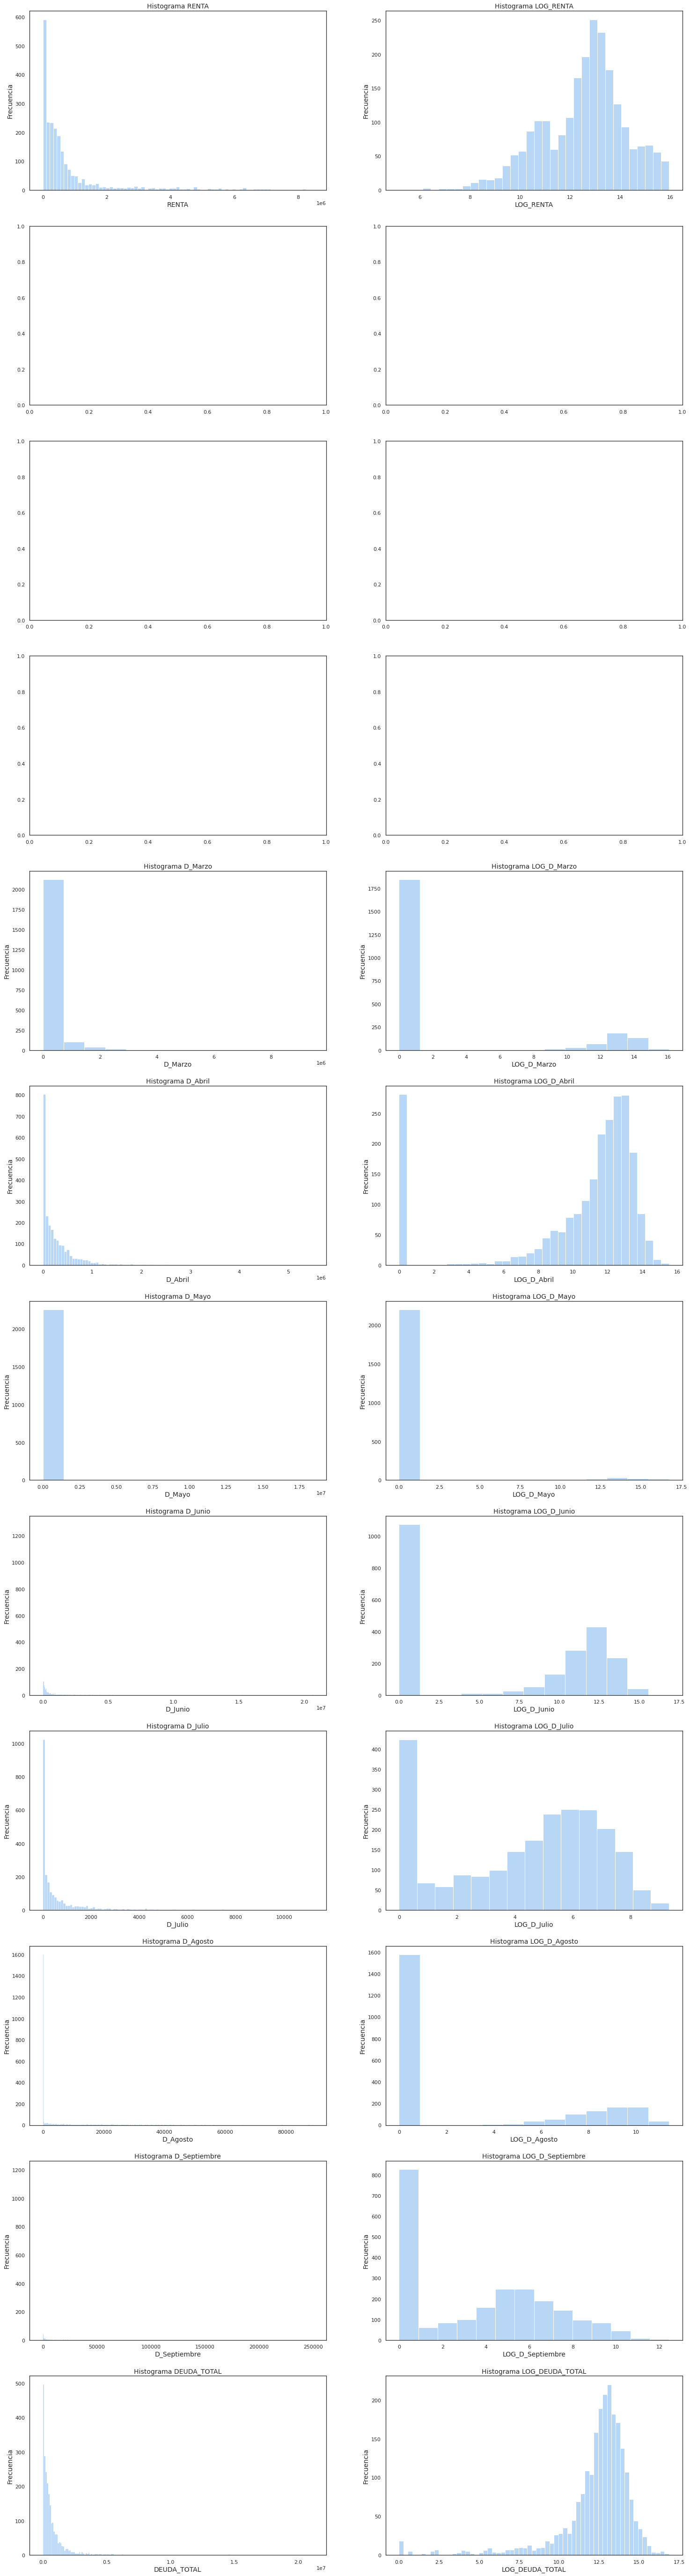

In [ ]:
df_gral['LOG_D_Marzo'] = np.log(df_gral['D_Marzo']+1) 
df_gral['LOG_D_Abril'] = np.log(df_gral['D_Abril']+1) 
df_gral['LOG_D_Mayo'] = np.log(df_gral['D_Mayo']+1) 
df_gral['LOG_D_Junio'] = np.log(df_gral['D_Junio']+1) 
df_gral['LOG_D_Julio'] = np.log(df_gral['D_Julio']+1) 
df_gral['LOG_D_Agosto'] = np.log(df_gral['D_Agosto']+1)
df_gral['LOG_D_Septiembre'] = np.log(df_gral['D_Septiembre']+1)
df_gral['LOG_RENTA'] = np.log(df_gral['RENTA']+1) 
df_gral['LOG_DEUDA_TOTAL'] = np.log(df_gral['DEUDA_TOTAL']+1)
#df_gral['LOG_EDAD'] = np.log(df_gral['EDAD']+1) 
#df_gral['LOG_M_MOROSO'] = np.log(df_gral['M_MOROSO']+1)
#df_gral['LOG_MONTO'] = np.log(df_gral['MONTO']+1)

fig, axes = plt.subplots(12,2,figsize=(25,100))

# gráficos fila 1
a3 = sns.histplot(data=df_gral, x='RENTA',ax=axes[0,0])
a3.set_ylabel('Frecuencia',fontsize=14)
a3.set_xlabel('RENTA',fontsize=14)
a3.set_title('Histograma RENTA',fontsize=14)

a4 = sns.histplot(data=df_gral, x='LOG_RENTA',ax=axes[0,1])
a4.set_ylabel('Frecuencia',fontsize=14)
a4.set_xlabel('LOG_RENTA',fontsize=14)
a4.set_title('Histograma LOG_RENTA',fontsize=14)

'''# gráficos fila 2
b3 = sns.histplot(data=df_gral, x='EDAD',ax=axes[1,0])
b3.set_ylabel('Frecuencia',fontsize=14)
b3.set_xlabel('EDAD',fontsize=14)
b3.set_title('Histograma EDAD',fontsize=14)

b4 = sns.histplot(data=df_gral, x='LOG_EDAD',ax=axes[1,1])
b4.set_ylabel('Frecuencia',fontsize=14)
b4.set_xlabel('LOG_EDAD',fontsize=14)
b4.set_title('Histograma LOG_EDAD',fontsize=14)

# gráficos fila 3
c3 = sns.histplot(data=df_gral, x='MONTO',ax=axes[2,0])
c3.set_ylabel('Frecuencia',fontsize=14)
c3.set_xlabel('MONTO',fontsize=14)
c3.set_title('Histograma MONTO',fontsize=14)

c4 = sns.histplot(data=df_gral, x='LOG_MONTO',ax=axes[2,1])
c4.set_ylabel('Frecuencia',fontsize=14)
c4.set_xlabel('LOG_MONTO',fontsize=14)
c4.set_title('Histograma LOG_MONTO',fontsize=14)

# gráficos fila 4
d3 = sns.histplot(data=df_gral, x='M_MOROSO',ax=axes[3,0], bins = 4)
d3.set_ylabel('Frecuencia',fontsize=14)
d3.set_xlabel('M_MOROSO',fontsize=14)
d3.set_title('Histograma M_MOROSO',fontsize=14)

d4 = sns.histplot(data=df_gral, x='LOG_M_MOROSO',ax=axes[3,1], bins = 4)
d4.set_ylabel('Frecuencia',fontsize=14)
d4.set_xlabel('LOG_M_MOROSO',fontsize=14)
d4.set_title('Histograma LOG_M_MOROSO',fontsize=14)'''

# gráficos fila 5
e3 = sns.histplot(data=df_gral, x='D_Marzo',ax=axes[4,0])
e3.set_ylabel('Frecuencia',fontsize=14)
e3.set_xlabel('D_Marzo',fontsize=14)
e3.set_title('Histograma D_Marzo',fontsize=14)

e4 = sns.histplot(data=df_gral, x='LOG_D_Marzo',ax=axes[4,1])
e4.set_ylabel('Frecuencia',fontsize=14)
e4.set_xlabel('LOG_D_Marzo',fontsize=14)
e4.set_title('Histograma LOG_D_Marzo',fontsize=14)

# gráficos fila 6
f3 = sns.histplot(data=df_gral, x='D_Abril',ax=axes[5,0])
f3.set_ylabel('Frecuencia',fontsize=14)
f3.set_xlabel('D_Abril',fontsize=14)
f3.set_title('Histograma D_Abril',fontsize=14)

f4 = sns.histplot(data=df_gral, x='LOG_D_Abril',ax=axes[5,1])
f4.set_ylabel('Frecuencia',fontsize=14)
f4.set_xlabel('LOG_D_Abril',fontsize=14)
f4.set_title('Histograma LOG_D_Abril',fontsize=14)

# gráficos fila 7
g3 = sns.histplot(data=df_gral, x='D_Mayo',ax=axes[6,0])
g3.set_ylabel('Frecuencia',fontsize=14)
g3.set_xlabel('D_Mayo',fontsize=14)
g3.set_title('Histograma D_Mayo',fontsize=14)

g4 = sns.histplot(data=df_gral, x='LOG_D_Mayo',ax=axes[6,1])
g4.set_ylabel('Frecuencia',fontsize=14)
g4.set_xlabel('LOG_D_Mayo',fontsize=14)
g4.set_title('Histograma LOG_D_Mayo',fontsize=14)

# gráficos fila 8
h3 = sns.histplot(data=df_gral, x='D_Junio',ax=axes[7,0])
h3.set_ylabel('Frecuencia',fontsize=14)
h3.set_xlabel('D_Junio',fontsize=14)
h3.set_title('Histograma D_Junio',fontsize=14)

h4 = sns.histplot(data=df_gral, x='LOG_D_Junio',ax=axes[7,1])
h4.set_ylabel('Frecuencia',fontsize=14)
h4.set_xlabel('LOG_D_Junio',fontsize=14)
h4.set_title('Histograma LOG_D_Junio',fontsize=14)

# gráficos fila 9
i3 = sns.histplot(data=df_gral, x='D_Julio',ax=axes[8,0])
i3.set_ylabel('Frecuencia',fontsize=14)
i3.set_xlabel('D_Julio',fontsize=14)
i3.set_title('Histograma D_Julio',fontsize=14)

i4 = sns.histplot(data=df_gral, x='LOG_D_Julio',ax=axes[8,1])
i4.set_ylabel('Frecuencia',fontsize=14)
i4.set_xlabel('LOG_D_Julio',fontsize=14)
i4.set_title('Histograma LOG_D_Julio',fontsize=14)

# gráficos fila 10
j3 = sns.histplot(data=df_gral, x='D_Agosto',ax=axes[9,0])
j3.set_ylabel('Frecuencia',fontsize=14)
j3.set_xlabel('D_Agosto',fontsize=14)
j3.set_title('Histograma D_Agosto',fontsize=14)

j4 = sns.histplot(data=df_gral, x='LOG_D_Agosto',ax=axes[9,1])
j4.set_ylabel('Frecuencia',fontsize=14)
j4.set_xlabel('LOG_D_Agosto',fontsize=14)
j4.set_title('Histograma LOG_D_Agosto',fontsize=14)

# gráficos fila 11
k3 = sns.histplot(data=df_gral, x='D_Septiembre',ax=axes[10,0])
k3.set_ylabel('Frecuencia',fontsize=14)
k3.set_xlabel('D_Septiembre',fontsize=14)
k3.set_title('Histograma D_Septiembre',fontsize=14)

k4 = sns.histplot(data=df_gral, x='LOG_D_Septiembre',ax=axes[10,1])
k4.set_ylabel('Frecuencia',fontsize=14)
k4.set_xlabel('LOG_D_Septiembre',fontsize=14)
k4.set_title('Histograma LOG_D_Septiembre',fontsize=14)

# gráficos fila 12
l3 = sns.histplot(data=df_gral, x='DEUDA_TOTAL',ax=axes[11,0])
l3.set_ylabel('Frecuencia',fontsize=14)
l3.set_xlabel('DEUDA_TOTAL',fontsize=14)
l3.set_title('Histograma DEUDA_TOTAL',fontsize=14)

l4 = sns.histplot(data=df_gral, x='LOG_DEUDA_TOTAL',ax=axes[11,1])
l4.set_ylabel('Frecuencia',fontsize=14)
l4.set_xlabel('LOG_DEUDA_TOTAL',fontsize=14)
l4.set_title('Histograma LOG_DEUDA_TOTAL',fontsize=14)

In [ ]:
#se eliminan las variables que se transformaron a logaritmo, para no tener información redudante

df_gral.drop(['D_Marzo','D_Abril','D_Mayo','D_Junio','D_Julio','D_Agosto','D_Septiembre','RENTA','DEUDA_TOTAL' ], axis='columns', inplace=True)

##4.2 Transformación variables categoricas


In [ ]:
# definimos los diccionarios
dic_educac = {'BAS':8,'MED':12,'TEC':14,'EUN':16,'UNV':18}
dic_regRM = {'NO':0,'SI':1}


# reemplazamos los valores en la variable
df_gral.replace({'NIV_EDUC':dic_educac}, inplace=True)
df_gral.replace({'REGION_RM':dic_regRM}, inplace=True)

df_gral.head()

,ID,GENERO,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,M_MOROSO,MONTO,SEGURO,FUGA,REGION_RM,RANGO_EDAD,LOG_D_Marzo,LOG_D_Abril,LOG_D_Mayo,LOG_D_Junio,LOG_D_Julio,LOG_D_Agosto,LOG_D_Septiembre,LOG_RENTA,LOG_DEUDA_TOTAL
0,1,M,39.0,12.0,CAS,68,213.0,LOS ANGELES,2,2000000,NO,NO FUGA,0,2,0.0,10.553022,0.0,12.981624,7.477038,9.117238,5.831882,13.523120,13.089563
1,2,F,49.0,12.0,VIU,16,89.0,SANTIAGO,1,7500000,SI,NO FUGA,1,3,0.0,0.000000,0.0,0.000000,3.891820,0.000000,0.000000,9.384462,3.891820
2,3,M,39.0,14.0,CAS,90,16.0,ANTOFAGASTA,1,8000000,NO,NO FUGA,0,2,0.0,13.311611,0.0,0.000000,5.780744,10.184523,7.981392,14.317147,13.359658
3,4,F,36.0,18.0,CAS,85,115.0,SANTIAGO,1,2600000,NO,NO FUGA,1,2,0.0,8.542081,0.0,12.201055,4.553877,0.000000,4.663439,13.367613,12.227457
4,5,M,44.0,14.0,CAS,45,80.0,SANTIAGO,1,6400000,NO,NO FUGA,1,3,0.0,9.388235,0.0,11.211280,5.010635,0.000000,5.609472,13.664820,11.365898


In [ ]:
# Se definen macrozonas para las ciudades, segun las regiones que agrupa. 
# teniendo como base la segmentación que realiza el "Ministerio de Ciencia, Tecnologia, Conocimiento e Innocación".

# 1 = Macrozona Norte: Arica y Parinacota, Tarapacá, Antofagasta, Atacama.
# 2 = Macrozona Centro: Coquimbo, Valparaiso.
# 3 = Metropolitana.
# 4 = Macrozona Centro Sur: O'Higgins, Maule, Ñuble, Biobío.
# 5 = Macrozona Sur: Araucanía, Los Ríos, Los Lagos.
# 6 = Macrozona Austral: Aysén, Magallanes.


dic_ciudad = {'ARICA':1 , 'IQUIQUE':1, 'TOCOPILLA':1, 'CHUQUICAMATA': 1, 'CALAMA':1,
       'ANTOFAGASTA':1, 'EL SALVADOR':1, 'COPIAPO':1, 'CALDERA':1, 'VALLENAR':1,
       'HUASCO':1, 'LA SERENA':2, 'COQUIMBO':2, 'OVALLE':2, 'LOS VILOS':2,
       'PETORCA':2, 'LOS ANDES':2, 'SAN ESTEBAN':2, 'SAN FELIPE':2, 'QUILLOTA':2,
       'LA CRUZ':2, 'LA CALERA':2, 'HIJUELAS':2, 'VALPARAISO':2, 'VINA DEL MAR':2,
       'CON-CON':2, 'QUILPUE':2, 'VLLA ALEMANA':2, 'SAN ANTONIO':2, 'LLO-LLEO':2,
       'STO DOMINGO':2, 'SANTIAGO':3, 'MELIPILLA':3, 'CURACAVI':3, 'SAN PEDRO':3,
       'TALAGANTE':3, 'PENAFLOR':3, 'RANCAGUA':4, 'MACHALI':4, 'RENGO':4,
       'DONIHUE':4, 'SAN FERNANDO':4, 'SANTA CRUZ':4, 'CURICO':4, 'TALCA':4,
       'SAN CLEMENTE':4, 'LINARES':4, 'COLBUN':4, 'PARRAL':4, 'CHILLAN':4,
       'LOS ANGELES':4, 'CONCEPCION':4, 'TALCAHUANO':4, 'PENCO':4, 'CORONEL':4,
       'ANGOL':5, 'TEMUCO':5, 'VILLARRICA':5, 'LONCOCHE':5, 'VALDIVIA':5,
       'LOS LAGOS':5, 'PANGUIPULLI':5, 'OSORNO':5, 'SAN PABLO':5, 'PUERTO OCTAY':5,
       'PUERTO MONTT':5, 'PUERTO VARAS':5, 'CALBUCO':5, 'LLANQUIHUE':5, 'CASTRO':5,
       'ANCUD':5, 'PALENA':5, 'COYHAIQUE':6, 'AYSEN':6, 'PUNTA ARENAS':6}

df_gral.replace({'CIUDAD':dic_ciudad}, inplace=True)

#5 Preprocesamiento

##5.1 Datos perdidos

Los siguientes atributos presentan algun valor nulo:
* Genero: Genero del cliente
* Edad: Edad en años
* NIV_Educ: Nivel educacional
* E_Civil: Estado civil
* COD_Com: Código de la comuna
* Ciudad: Ciudad de la oficina

In [ ]:
df_gral.isna().sum()

ID                   0
GENERO              11
EDAD                 2
NIV_EDUC            11
E_CIVIL             11
COD_OFI              0
COD_COM              3
CIUDAD               3
M_MOROSO             0
MONTO                0
SEGURO               0
FUGA                 0
REGION_RM            0
RANGO_EDAD           0
LOG_D_Marzo          0
LOG_D_Abril          0
LOG_D_Mayo           0
LOG_D_Junio          0
LOG_D_Julio          0
LOG_D_Agosto         0
LOG_D_Septiembre     0
LOG_RENTA            0
LOG_DEUDA_TOTAL      0
dtype: int64

##5.2 Declarar valores perdidos o inconsistencias

In [ ]:
df_gral.loc[df_gral['EDAD'] < 18, 'EDAD'] = np.nan
df_gral.loc[df_gral['EDAD'] > 100, 'EDAD'] = np.nan
df_gral.isna().sum()

ID                   0
GENERO              11
EDAD                 7
NIV_EDUC            11
E_CIVIL             11
COD_OFI              0
COD_COM              3
CIUDAD               3
M_MOROSO             0
MONTO                0
SEGURO               0
FUGA                 0
REGION_RM            0
RANGO_EDAD           0
LOG_D_Marzo          0
LOG_D_Abril          0
LOG_D_Mayo           0
LOG_D_Junio          0
LOG_D_Julio          0
LOG_D_Agosto         0
LOG_D_Septiembre     0
LOG_RENTA            0
LOG_DEUDA_TOTAL      0
dtype: int64

##5.3 Imputar valores perdidos

Se realiza una imputación multiple sobre los datos numericos

In [ ]:
'''df_gral['GENERO'].fillna(df_gral['GENERO'].mode()[0], inplace=True)
df_gral['NIV_EDUC'].fillna(df_gral['NIV_EDUC'].mode()[0], inplace=True)
df_gral['E_CIVIL'].fillna(df_gral['E_CIVIL'].mode()[0], inplace=True)
df_gral['COD_COM'].fillna(df_gral['COD_COM'].mode()[0], inplace=True)
df_gral['CIUDAD'].fillna(df_gral['CIUDAD'].mode()[0], inplace=True)
df_gral['EDAD'].fillna(np.nanmedian(df_gral['EDAD']), inplace=True)
df_gral.isna().sum()'''

# imputación de datos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# imputamos valores perdidos
mice = IterativeImputer(random_state=0)
# ajusta los parámetros del método para realizar la imputación
mice.fit(df_gral._get_numeric_data())
# realiza la imputación de los valores perdidos
df_gral[df_gral._get_numeric_data().columns] = mice.transform(df_gral._get_numeric_data()).round(2)

df_gral.isna().sum()

ID                   0
GENERO              11
EDAD                 0
NIV_EDUC             0
E_CIVIL             11
COD_OFI              0
COD_COM              0
CIUDAD               0
M_MOROSO             0
MONTO                0
SEGURO               0
FUGA                 0
REGION_RM            0
RANGO_EDAD           0
LOG_D_Marzo          0
LOG_D_Abril          0
LOG_D_Mayo           0
LOG_D_Junio          0
LOG_D_Julio          0
LOG_D_Agosto         0
LOG_D_Septiembre     0
LOG_RENTA            0
LOG_DEUDA_TOTAL      0
dtype: int64

finalmente se hace una imputación ad-hoc en los datos categoricos

In [ ]:
df_gral['E_CIVIL'].fillna(value=df_gral['E_CIVIL'].value_counts().index[0],inplace =True)
df_gral['GENERO'].fillna(value=df_gral['GENERO'].value_counts().index[0],inplace =True)
df_gral.isna().sum()

ID                  0
GENERO              0
EDAD                0
NIV_EDUC            0
E_CIVIL             0
COD_OFI             0
COD_COM             0
CIUDAD              0
M_MOROSO            0
MONTO               0
SEGURO              0
FUGA                0
REGION_RM           0
RANGO_EDAD          0
LOG_D_Marzo         0
LOG_D_Abril         0
LOG_D_Mayo          0
LOG_D_Junio         0
LOG_D_Julio         0
LOG_D_Agosto        0
LOG_D_Septiembre    0
LOG_RENTA           0
LOG_DEUDA_TOTAL     0
dtype: int64

##5.4 Normalizar datos


In [ ]:
# escalamos entre 0 y 1 (min-max)
scaler = MinMaxScaler()
# aplicamos el método
df_gral[df_gral._get_numeric_data().columns] = scaler.fit_transform(df_gral[df_gral._get_numeric_data().columns])
print(f"Filas: {len(df_gral)}")
df_gral.head()

Filas: 2294


,ID,GENERO,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,M_MOROSO,MONTO,SEGURO,FUGA,REGION_RM,RANGO_EDAD,LOG_D_Marzo,LOG_D_Abril,LOG_D_Mayo,LOG_D_Junio,LOG_D_Julio,LOG_D_Agosto,LOG_D_Septiembre,LOG_RENTA,LOG_DEUDA_TOTAL
0,0.000000,M,0.260628,0.4,CAS,0.438710,0.411650,0.6,0.666667,0.200000,NO,NO FUGA,0.0,0.4,0.0,0.679768,0.0,0.770784,0.802575,0.800702,0.469027,0.774373,0.775934
1,0.000436,F,0.383857,0.4,VIU,0.103226,0.170874,0.4,0.333333,0.933333,SI,NO FUGA,1.0,0.6,0.0,0.000000,0.0,0.000000,0.417382,0.000000,0.000000,0.389972,0.230587
2,0.000872,M,0.260628,0.6,CAS,0.580645,0.029126,0.0,0.333333,1.000000,NO,NO FUGA,0.0,0.4,0.0,0.857603,0.0,0.000000,0.620172,0.893766,0.641995,0.848654,0.791938
3,0.001308,F,0.223660,1.0,CAS,0.548387,0.221359,0.4,0.333333,0.280000,NO,NO FUGA,1.0,0.4,0.0,0.550258,0.0,0.724466,0.488197,0.000000,0.374899,0.760446,0.724956
4,0.001744,M,0.322243,0.6,CAS,0.290323,0.153398,0.4,0.333333,0.786667,NO,NO FUGA,1.0,0.6,0.0,0.605026,0.0,0.665677,0.537554,0.000000,0.451327,0.787372,0.673977


#6 Selección de atributos


##6.1 Filtro de dispersión


In [ ]:
df_gral.std().round(2)

ID                  0.29
EDAD                0.10
NIV_EDUC            0.26
COD_OFI             0.26
COD_COM             0.16
CIUDAD              0.21
M_MOROSO            0.25
MONTO               0.31
REGION_RM           0.49
RANGO_EDAD          0.17
LOG_D_Marzo         0.32
LOG_D_Abril         0.27
LOG_D_Mayo          0.16
LOG_D_Junio         0.35
LOG_D_Julio         0.29
LOG_D_Agosto        0.36
LOG_D_Septiembre    0.26
LOG_RENTA           0.16
LOG_DEUDA_TOTAL     0.14
dtype: float64

##6.2 Filtro de correlación


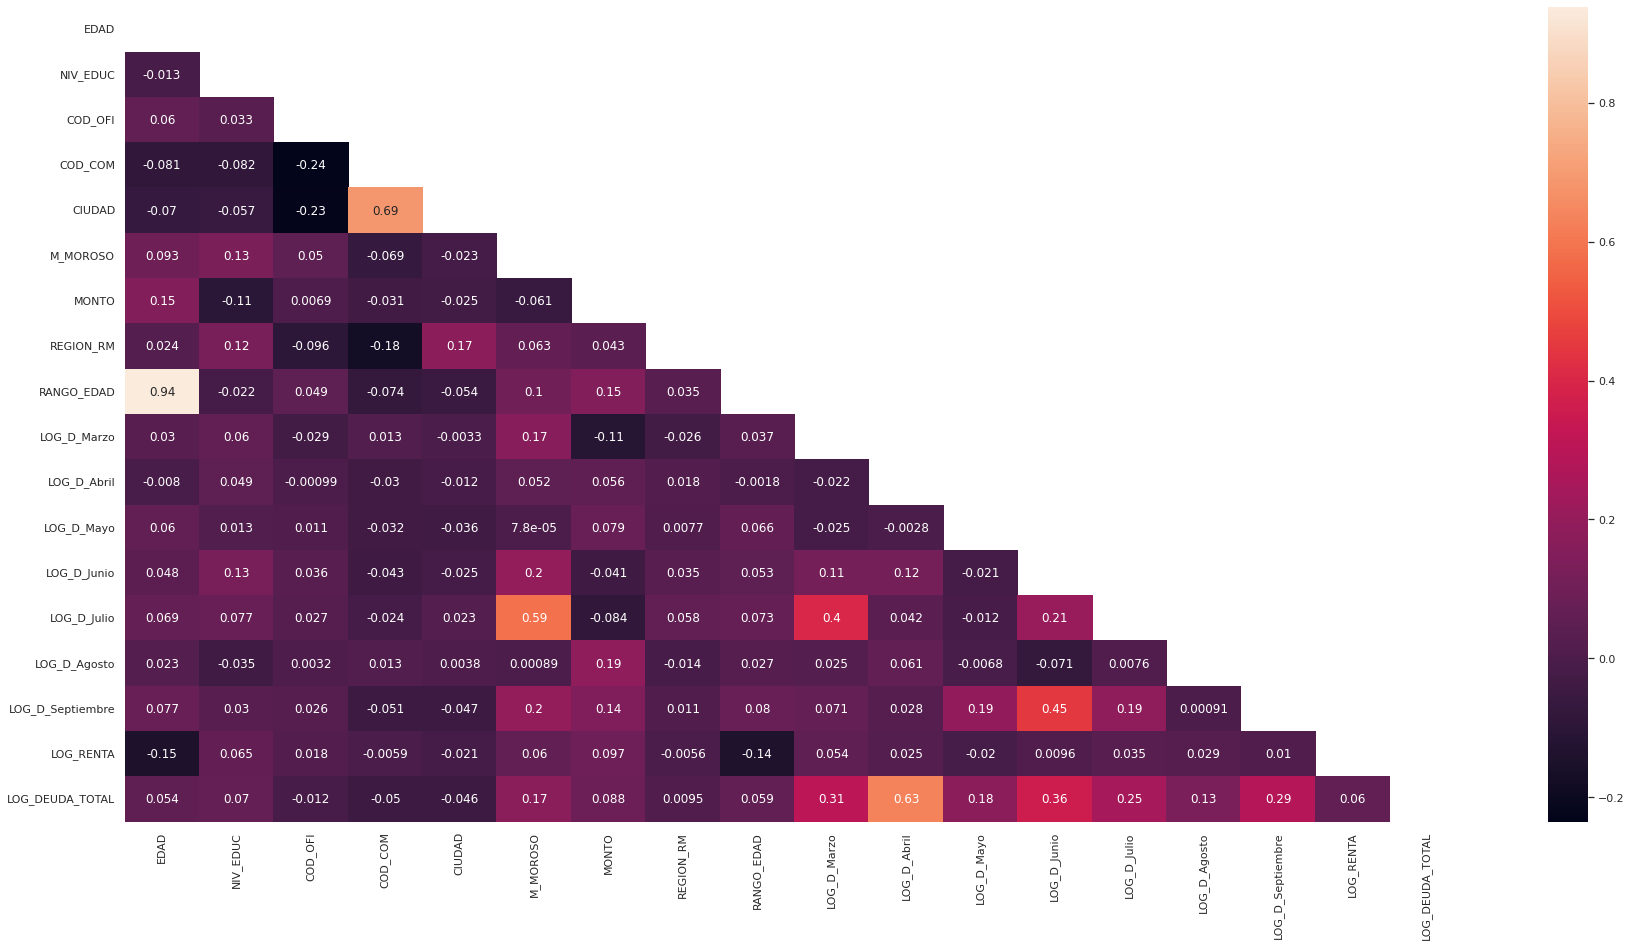

In [ ]:
plt.figure(figsize=(30,15))
df_corr=df_gral
df_corr.drop('ID', axis=1, inplace=True)
# computamos matriz de correlación
corr_matrix = df_corr.corr() # acá por defecto vamos a calcular correlacion pearson
# esto nos permite graficar sólo la parte superior o inferior de la matriz
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# plot
sns.heatmap(corr_matrix,mask=mask,annot=True)

Se eliminan variables por ser redundantes, ya que se espera obtener información similar a partir de variables creadas y por tener alta correlación

In [ ]:
df_gral.drop(['RANGO_EDAD','COD_COM','LOG_D_Marzo','LOG_D_Abril','LOG_D_Mayo','LOG_D_Junio','LOG_D_Julio','LOG_D_Agosto','LOG_D_Septiembre'], axis=1, inplace=True)
df_gral.head()

,GENERO,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,CIUDAD,M_MOROSO,MONTO,SEGURO,FUGA,REGION_RM,LOG_RENTA,LOG_DEUDA_TOTAL
0,M,0.260628,0.4,CAS,0.438710,0.6,0.666667,0.200000,NO,NO FUGA,0.0,0.774373,0.775934
1,F,0.383857,0.4,VIU,0.103226,0.4,0.333333,0.933333,SI,NO FUGA,1.0,0.389972,0.230587
2,M,0.260628,0.6,CAS,0.580645,0.0,0.333333,1.000000,NO,NO FUGA,0.0,0.848654,0.791938
3,F,0.223660,1.0,CAS,0.548387,0.4,0.333333,0.280000,NO,NO FUGA,1.0,0.760446,0.724956
4,M,0.322243,0.6,CAS,0.290323,0.4,0.333333,0.786667,NO,NO FUGA,1.0,0.787372,0.673977


##6.3 Test Chi-Square


In [ ]:
def chicsquare(c_table):
  from scipy.stats import chi2_contingency 
  # aplicamos el test
  stat, p_val, dof, expected = chi2_contingency(c_table) 
  
  # interpretamos el p-value 
  alpha = 0.05
  print(f"p-value = {round(p_val,4)} | estadístico: {round(stat,3)}")
  if p_val < alpha:
      print('Las variables son dependientes (Rechaza Hipótesis Nula)  | Existe relación entre las variables') 
  else: 
      print('Las variables son independientes (Acepta Hipótesis Nula) | No existe relación entre las variables')

###6.3.1 GENERO

In [ ]:
c_table = pd.crosstab(df_gral['GENERO'],df_gral['FUGA'],margins = False)
print(c_table)

FUGA    FUGA  NO FUGA
GENERO               
F        179      719
M        958      438


In [ ]:
chicsquare(pd.crosstab(df_gral['GENERO'],df_gral['FUGA'],margins = False))

p-value = 0.0 | estadístico: 516.337
Las variables son dependientes (Rechaza Hipótesis Nula)  | Existe relación entre las variables


###6.3.2 SEGURO

In [ ]:
c_table = pd.crosstab(df_gral['SEGURO'],df_gral['FUGA'],margins = False)
print(c_table)

FUGA    FUGA  NO FUGA
SEGURO               
NO       938      878
SI       199      279


In [ ]:
chicsquare(pd.crosstab(df_gral['SEGURO'],df_gral['FUGA'],margins = False))

p-value = 0.0001 | estadístico: 14.8
Las variables son dependientes (Rechaza Hipótesis Nula)  | Existe relación entre las variables


###6.3.3 E_CIVIL

In [ ]:
c_table = pd.crosstab(df_gral['E_CIVIL'],df_gral['FUGA'],margins = False)
print(c_table)

FUGA     FUGA  NO FUGA
E_CIVIL               
CAS       863      577
SEP        61       53
SOL       200      442
VIU        13       85


In [ ]:
chicsquare(pd.crosstab(df_gral['E_CIVIL'],df_gral['FUGA'],margins = False))

p-value = 0.0 | estadístico: 201.324
Las variables son dependientes (Rechaza Hipótesis Nula)  | Existe relación entre las variables


###6.3.4 REGION_RM

In [ ]:
c_table = pd.crosstab(df_gral['REGION_RM'],df_gral['FUGA'],margins = False)
print(c_table)

FUGA       FUGA  NO FUGA
REGION_RM               
0.0         343      562
1.0         794      595


In [ ]:
chicsquare(pd.crosstab(df_gral['REGION_RM'],df_gral['FUGA'],margins = False))

p-value = 0.0 | estadístico: 80.569
Las variables son dependientes (Rechaza Hipótesis Nula)  | Existe relación entre las variables


De acuerdo a los resultados del Test Chi-Square, se mantienen todas las variables

## 6.4 Test Kolmogorov-Smirnov

In [ ]:
def ecdf(data):
    # Computa la distribución empirica acumulada (ECDF por sus siglas en ingles)
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return x,y

def plot_kolmogorov(sample1, sample2,variable_name='',alpha=0.05):
  import matplotlib.pyplot as plt
  from scipy import stats
  # obtenemos la ECDF para cada muestra y las ordenamos
  x1,y1 = ecdf(sample1)
  x2,y2 = ecdf(sample2)
  # plot
  plt.figure(figsize=(9, 6))
  sns.lineplot(x=x1, y=y1, color='red')
  sns.lineplot(x=x2, y=y2, color='blue')
  # test
  stat, p_val = stats.ks_2samp(sample1, sample2)
  # interpretamos el p-value 
  print(f"p-value: {round(p_val,4)} | alpha: {alpha}") 
  if p_val < alpha: 
      print('Las distribuciones son independientes (Rechaza Hipótesis Nula) | Existe relación entre las variables') 
  else: 
      print('Las distribuciones son dependientes (Acepta Hipótesis Nula) | No existe relación entre las variables') 
  plt.ylabel("Cumulative Distribution Function")
  plt.xlabel(variable_name)
  plt.show()

p-value: 0.304 | alpha: 0.05
Las distribuciones son dependientes (Acepta Hipótesis Nula) | No existe relación entre las variables


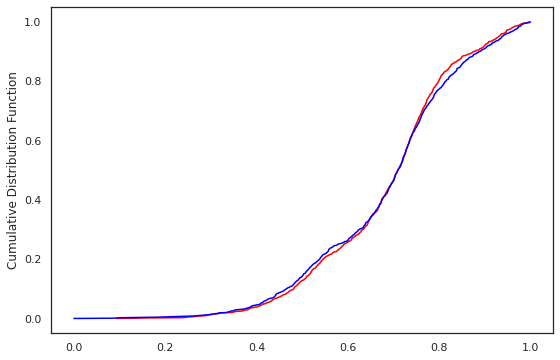

In [ ]:
variable = 'LOG_RENTA'
plot_kolmogorov(df_gral[df_gral['FUGA']=="FUGA"][variable].values, df_gral[df_gral['FUGA']=="NO FUGA"][variable].values)

p-value: 0.0 | alpha: 0.05
Las distribuciones son independientes (Rechaza Hipótesis Nula) | Existe relación entre las variables


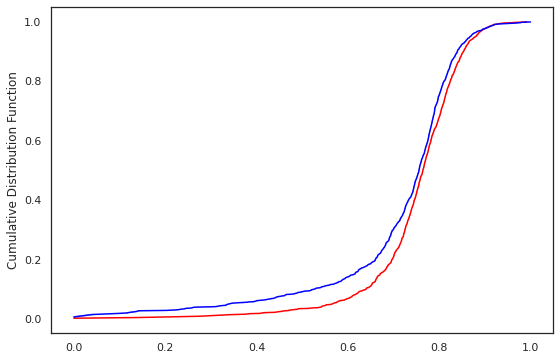

In [ ]:
variable = 'LOG_DEUDA_TOTAL'
plot_kolmogorov(df_gral[df_gral['FUGA']=="FUGA"][variable].values, df_gral[df_gral['FUGA']=="NO FUGA"][variable].values)

p-value: 0.0 | alpha: 0.05
Las distribuciones son independientes (Rechaza Hipótesis Nula) | Existe relación entre las variables


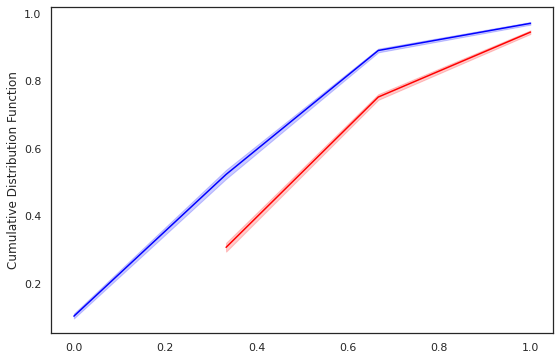

In [ ]:
variable = 'M_MOROSO'
plot_kolmogorov(df_gral[df_gral['FUGA']=="FUGA"][variable].values, df_gral[df_gral['FUGA']=="NO FUGA"][variable].values)

p-value: 0.0 | alpha: 0.05
Las distribuciones son independientes (Rechaza Hipótesis Nula) | Existe relación entre las variables


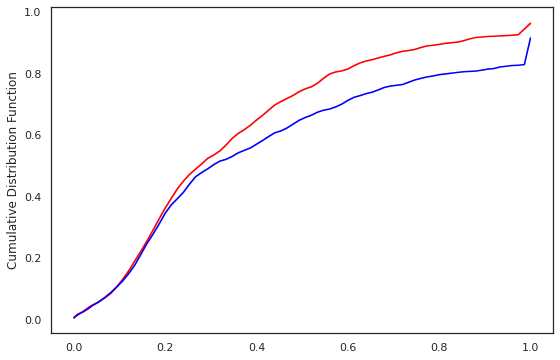

In [ ]:
variable = 'MONTO'
plot_kolmogorov(df_gral[df_gral['FUGA']=="FUGA"][variable].values, df_gral[df_gral['FUGA']=="NO FUGA"][variable].values)

p-value: 0.0 | alpha: 0.05
Las distribuciones son independientes (Rechaza Hipótesis Nula) | Existe relación entre las variables


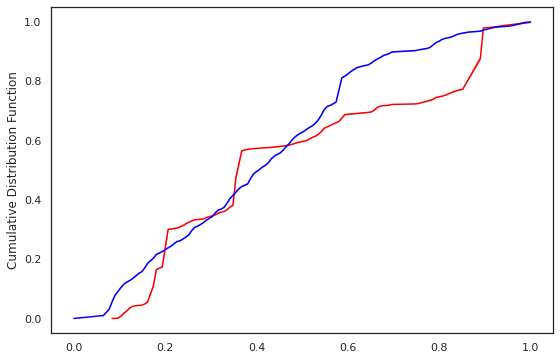

In [ ]:
variable = 'COD_OFI'
plot_kolmogorov(df_gral[df_gral['FUGA']=="FUGA"][variable].values, df_gral[df_gral['FUGA']=="NO FUGA"][variable].values)

p-value: 0.0 | alpha: 0.05
Las distribuciones son independientes (Rechaza Hipótesis Nula) | Existe relación entre las variables


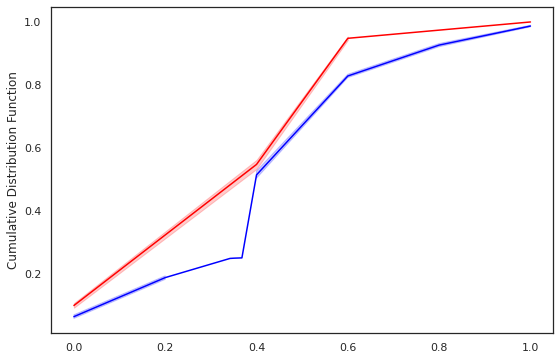

In [ ]:
variable = 'CIUDAD'
plot_kolmogorov(df_gral[df_gral['FUGA']=="FUGA"][variable].values, df_gral[df_gral['FUGA']=="NO FUGA"][variable].values)

De acuerdo al Test Kolmogorov-SmirnovSe, se decide eliminar la variable LOG_RENTA, ya que no representa una relación con la variable objetivo FUGA

In [ ]:
df_gral.drop(['LOG_RENTA'], axis=1, inplace=True)

In [ ]:
df_gral = pd.concat([df_gral.drop('GENERO', axis=1), pd.get_dummies(df_gral['GENERO'], prefix='GENERO').iloc[:,:-1]], axis=1)
df_gral = pd.concat([df_gral.drop('E_CIVIL', axis=1), pd.get_dummies(df_gral['E_CIVIL'], prefix='E_CIVIL').iloc[:,:-1]], axis=1)
df_gral = pd.concat([df_gral.drop('SEGURO', axis=1), pd.get_dummies(df_gral['SEGURO'], prefix='SEGURO').iloc[:,:-1]], axis=1)

df_gral.head()

,EDAD,NIV_EDUC,COD_OFI,CIUDAD,M_MOROSO,MONTO,FUGA,REGION_RM,LOG_DEUDA_TOTAL,GENERO_F,E_CIVIL_CAS,E_CIVIL_SEP,E_CIVIL_SOL,SEGURO_NO
0,0.260628,0.4,0.438710,0.6,0.666667,0.200000,NO FUGA,0.0,0.775934,0,1,0,0,1
1,0.383857,0.4,0.103226,0.4,0.333333,0.933333,NO FUGA,1.0,0.230587,1,0,0,0,0
2,0.260628,0.6,0.580645,0.0,0.333333,1.000000,NO FUGA,0.0,0.791938,0,1,0,0,1
3,0.223660,1.0,0.548387,0.4,0.333333,0.280000,NO FUGA,1.0,0.724956,1,1,0,0,1
4,0.322243,0.6,0.290323,0.4,0.333333,0.786667,NO FUGA,1.0,0.673977,0,1,0,0,1


# 7 Data Mining

##7.1 Pasos Previos

Se creara una diccionario con los resultados de cada modelo

In [ ]:
dict_resultados={}

División de la base de datos

In [ ]:
df=df_gral
from sklearn.model_selection import train_test_split
# split
X_train, X_test, y_train, y_test = train_test_split(df[df.columns.difference(['FUGA'])], df['FUGA'], test_size=0.2, random_state=101)

Importar metricas de desempeño

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Definir funciones para obtener matriz de confusión

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    fig = plt.figure(figsize=(6,6))
    plt.title(title, figure=fig)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, figure=fig)
    plt.yticks(tick_marks, classes, figure=fig)

    # normalized confusion matrix
    ncm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = 0.5
    for i, j in itertools.product(range(ncm.shape[0]), range(ncm.shape[1])):
        plt.text(j, i, str(round(100*ncm[i, j],2))+"%",
                 horizontalalignment="center",
                 color="white" if ncm[i, j] > thresh else "black",
                 fontsize=12, figure=fig)
        plt.text(j, i+0.1, str(cm[i, j]),
                 horizontalalignment="center",
                 color="black",
                 fontsize=10, figure=fig)

    plt.imshow(ncm, interpolation='nearest', cmap=cmap, vmin=0, vmax=1, figure=fig)

    plt.colorbar()

    plt.tight_layout()
    plt.ylabel('True label',figure=fig)
    plt.xlabel('Predicted label',figure=fig)
    plt.close(fig)
    return fig


def get_cm(true_labels, predicted_labels):
    #get confusion matrix
    labels = np.unique(true_labels)
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    #get plot of confusion matrix
    plot = plot_confusion_matrix(cm, labels)
    return plot, cm

##7.2 Logit (Regresión Logistica)

Accuracy train: 0.8043596730245232
Accuracy test : 0.8082788671023965
              precision    recall  f1-score   support

     NO FUGA       0.77      0.84      0.81       218
        FUGA       0.85      0.78      0.81       241

    accuracy                           0.81       459
   macro avg       0.81      0.81      0.81       459
weighted avg       0.81      0.81      0.81       459

Costo total modelo logit = $-89400


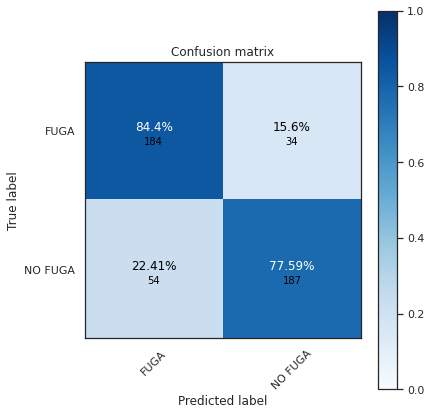

In [ ]:

from sklearn.linear_model import LogisticRegression
# train
logit = LogisticRegression(random_state=0).fit(X_train, y_train)
print(f"Accuracy train: {accuracy_score(y_train, logit.predict(X_train))}")
print(f"Accuracy test : {accuracy_score(y_test, logit.predict(X_test))}")

model = logit
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=list(set(y_train))))
cm = get_cm(y_test, y_pred)
costo_total=cm[1][0][0]*1000+cm[1][0][1]*(-100)+cm[1][1][0]*(-5000)+cm[1][1][1]*0
print("Costo total modelo {} = ${}".format("logit",costo_total))
dict_resultados['logit']=costo_total
cm[0]


##7.3 KNN (k-vecinos más cercanos)

Primero se probaran distintos valores para el hiperparametro k

Text(0, 0.5, 'Accuracy')

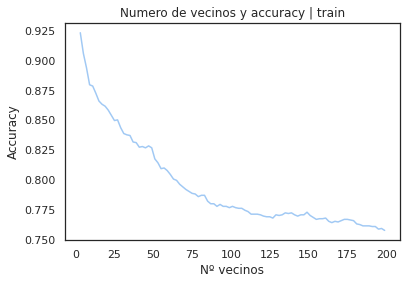

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# train for diferent number of neighbors
accuracies = []
neighbors = list(range(3,200,2)) # numeros impares de vecinos
for n_neighbor in neighbors:
  # train
  knn = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X_train, y_train)
  # predict y guardar accuracy
  accuracies.append(accuracy_score(y_train, knn.predict(X_train)))
# plot
plt.plot(neighbors,accuracies)
plt.title('Numero de vecinos y accuracy | train')
plt.xlabel('Nº vecinos')
plt.ylabel('Accuracy')

Se observa que el accuracy crece con el valor de k. en la literatura se aconseja no utilizar valores muy pequeños de k y se recomienda usar k=raiz(n) donde n son la cantidad de observaciones.

Accuracy train: 0.8283378746594006
Accuracy test : 0.8453159041394336
              precision    recall  f1-score   support

     NO FUGA       0.80      0.89      0.85       218
        FUGA       0.89      0.80      0.84       241

    accuracy                           0.85       459
   macro avg       0.85      0.85      0.85       459
weighted avg       0.85      0.85      0.85       459

Costo total modelo knn = $-47300


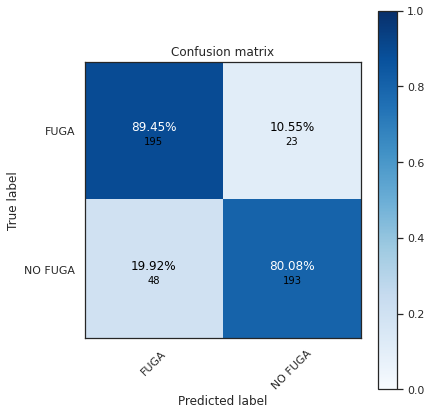

In [ ]:
# train

knn = KNeighborsClassifier(n_neighbors=47).fit(X_train, y_train)
print(f"Accuracy train: {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Accuracy test : {accuracy_score(y_test, knn.predict(X_test))}")

model = knn
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=list(set(y_train))))
cm = get_cm(y_test, y_pred)
costo_total=cm[1][0][0]*1000+cm[1][0][1]*(-100)+cm[1][1][0]*(-5000)+cm[1][1][1]*0
print("Costo total modelo {} = ${}".format("knn",costo_total))
dict_resultados['knn']=costo_total
cm[0]

##7.4 Arbol de Decision

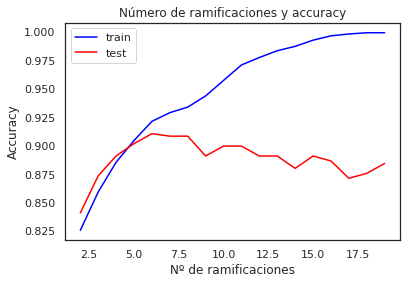

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# train for diferent number of neurons in hidden layer
accuracie_train = []
accuracie_test = []
# numero de árboles 
depths = list(range(2,20))
for depth in depths:
  # train
  TREE = DecisionTreeClassifier(random_state=0, max_depth = depth).fit(X_train,y_train)
  # predict y guardar accuracy
  accuracie_train.append(accuracy_score(y_train, TREE.predict(X_train)))
  accuracie_test.append(accuracy_score(y_test, TREE.predict(X_test)))

# plot
plt.plot(depths,accuracie_train, color='blue')
plt.plot(depths,accuracie_test, color='red')
plt.title('Número de ramificaciones y accuracy')
plt.xlabel('Nº de ramificaciones')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

En el gráfico se muestran distintos valores para el hiperparametro N° de ramificaciones. 
Se concluye que la profundidad optima del arbol es de 6.

Accuracy train: 0.9215258855585831
Accuracy test : 0.9106753812636166
              precision    recall  f1-score   support

     NO FUGA       0.88      0.94      0.91       218
        FUGA       0.94      0.89      0.91       241

    accuracy                           0.91       459
   macro avg       0.91      0.91      0.91       459
weighted avg       0.91      0.91      0.91       459

Costo total modelo TREE = $67600


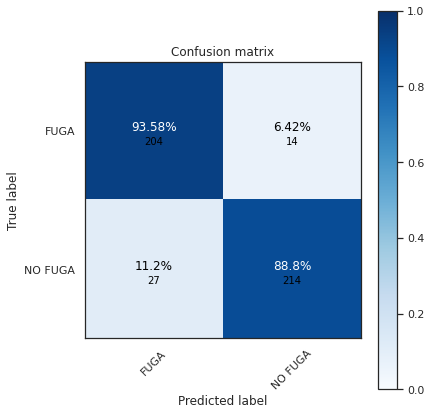

In [ ]:
# plot
from sklearn import tree
TREE = DecisionTreeClassifier(random_state=0, max_depth = 6).fit(X_train,y_train)
print(f"Accuracy train: {accuracy_score(y_train, TREE.predict(X_train))}")
print(f"Accuracy test : {accuracy_score(y_test, TREE.predict(X_test))}")

model = TREE
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=list(set(y_train))))
cm = get_cm(y_test, y_pred)
costo_total=cm[1][0][0]*1000+cm[1][0][1]*(-100)+cm[1][1][0]*(-5000)+cm[1][1][1]*0
print("Costo total modelo {} = ${}".format("TREE",costo_total))
dict_resultados['TREE']=costo_total
cm[0]

##7.5 Random Forest

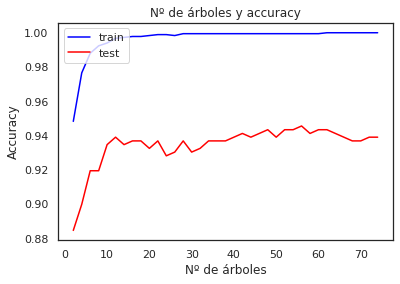

In [72]:
from sklearn.ensemble import RandomForestClassifier
# train for diferent number of trees
accuracie_train = []
accuracie_test = []
# numero de árboles 
n_estimators = list(range(2,75,2))
for n_estimator in n_estimators:
  # train
  RF = RandomForestClassifier(n_estimators=n_estimator, random_state=9, n_jobs=-1).fit(X_train,y_train)
  # predict y guardar accuracy
  accuracie_train.append(accuracy_score(y_train, RF.predict(X_train)))
  accuracie_test.append(accuracy_score(y_test, RF.predict(X_test)))

# plot
plt.plot(n_estimators,accuracie_train, color='blue')
plt.plot(n_estimators,accuracie_test, color='red')
plt.title('Nº de árboles y accuracy')
plt.xlabel('Nº de árboles')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

Accuracy train: 0.9967302452316076
Accuracy test : 0.9389978213507625
              precision    recall  f1-score   support

        FUGA       0.92      0.95      0.94       218
     NO FUGA       0.95      0.93      0.94       241

    accuracy                           0.94       459
   macro avg       0.94      0.94      0.94       459
weighted avg       0.94      0.94      0.94       459

Costo total modelo RF = $120900


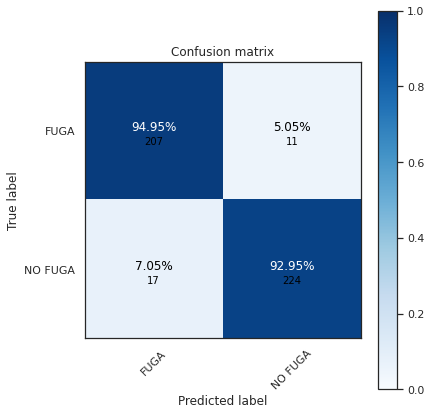

In [73]:
RF = RandomForestClassifier(n_estimators=12, random_state=9, n_jobs=-1).fit(X_train,y_train)
print(f"Accuracy train: {accuracy_score(y_train, RF.predict(X_train))}")
print(f"Accuracy test : {accuracy_score(y_test, RF.predict(X_test))}")

model = RF
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=list(set(y_train))))
cm = get_cm(y_test, y_pred)
costo_total=cm[1][0][0]*1000+cm[1][0][1]*(-100)+cm[1][1][0]*(-5000)+cm[1][1][1]*0
print("Costo total modelo {} = ${}".format("RF",costo_total))
dict_resultados['RF']=costo_total
cm[0]

In [ ]:
df_resultados=pd.DataFrame(dict_resultados.items(), columns=['Modelo','Beneficio [$]'])
df_resultados.sort_values('Beneficio [$]', ascending=False)

,Modelo,Beneficio [$]
3,RF,124800
2,TREE,67600
1,knn,-47300
0,logit,-89400


#8 Conclusiones

En base a la tabla anterior se concluye que el modelo con mayor beneficio es el RF Random Forest ($120.900), por lo que será el utilizado para hacer la predicción sobre la base de datos "BASEFUGA_PREDICCION.xlsx". Además se encuentra que el modelo cuenta con las mejores metricas de clasificación, en particular de Accuracy  en el conjunto de testeo (93.8%) y Recall (95%).

#9 Predicción

Se procede a hacer la predicción con la BASEFUGA_PREDICCION. Primero se debe replicar el preprocesamiento y filtro de atributos realizado.

In [ ]:
df_pred.head()

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,2295,M,457693.0,45,UNV,CAS,31,119.0,SANTIAGO,0,190591,0,20396,0,0,415,1.0,2700000,NO,NaN
1,2296,F,2258382.0,30,TEC,SOL,74,272.0,VALDIVIA,0,47354,0,0,0,0,2,0.0,1900000,NO,NaN
2,2297,M,546190.0,51,UNV,CAS,138,1.0,ARICA,622808,61646,0,268771,235,2913,0,1.0,1100000,SI,NaN
3,2298,F,424424.0,41,MED,SOL,138,80.0,SANTIAGO,0,1054,0,392871,1961,0,1022,3.0,3500000,NO,NaN
4,2299,M,6862726.0,42,MED,CAS,52,91.0,SANTIAGO,0,264308,0,87931,74,0,38,1.0,2000000,NO,NaN


In [75]:
#Preprocesamiento

df_pred.drop('FUGA',axis=1, inplace=True)
df_pred["DEUDA_TOTAL"]= df_pred["D_Marzo"] + df_pred["D_Abril"] + df_pred["D_Mayo"]+df_pred["D_Junio"]+df_pred["D_Julio"]+df_pred["D_Agosto"]+df_pred["D_Septiembre"]
df_pred['REGION_RM'] = df_pred['CIUDAD'].apply(lambda x: 'SI' if x=='SANTIAGO' else 'NO')
rangos= [
    (df_pred['EDAD'] < 30) ,
    (df_pred['EDAD'] >= 30) & (df_pred['EDAD'] < 40),
    (df_pred['EDAD'] >= 40) & (df_pred['EDAD'] < 50),
    (df_pred['EDAD'] >= 50) & (df_pred['EDAD'] < 60),
    (df_pred['EDAD'] >= 60)]
lista = [1,2,3,4,5]
df_pred['RANGO_EDAD'] = np.select(rangos, lista)
df_pred['LOG_D_Marzo'] = np.log(df_pred['D_Marzo']+1) 
df_pred['LOG_D_Abril'] = np.log(df_pred['D_Abril']+1) 
df_pred['LOG_D_Mayo'] = np.log(df_pred['D_Mayo']+1) 
df_pred['LOG_D_Junio'] = np.log(df_pred['D_Junio']+1) 
df_pred['LOG_D_Julio'] = np.log(df_pred['D_Julio']+1) 
df_pred['LOG_D_Agosto'] = np.log(df_pred['D_Agosto']+1)
df_pred['LOG_D_Septiembre'] = np.log(df_pred['D_Septiembre']+1)
df_pred['LOG_RENTA'] = np.log(df_pred['RENTA']+1) 
df_pred['LOG_DEUDA_TOTAL'] = np.log(df_pred['DEUDA_TOTAL']+1)
df_pred.drop(['D_Marzo','D_Abril','D_Mayo','D_Junio','D_Julio','D_Agosto','D_Septiembre','RENTA','DEUDA_TOTAL' ], axis='columns', inplace=True)
dic_educac = {'BAS':8,'MED':12,'TEC':14,'EUN':16,'UNV':18}
dic_regRM = {'NO':0,'SI':1}
df_pred.replace({'NIV_EDUC':dic_educac}, inplace=True)
df_pred.replace({'REGION_RM':dic_regRM}, inplace=True)
dic_ciudad = {'ARICA':1 , 'IQUIQUE':1, 'TOCOPILLA':1, 'CHUQUICAMATA': 1, 'CALAMA':1,
       'ANTOFAGASTA':1, 'EL SALVADOR':1, 'COPIAPO':1, 'CALDERA':1, 'VALLENAR':1,
       'HUASCO':1, 'LA SERENA':2, 'COQUIMBO':2, 'OVALLE':2, 'LOS VILOS':2,
       'PETORCA':2, 'LOS ANDES':2, 'SAN ESTEBAN':2, 'SAN FELIPE':2, 'QUILLOTA':2,
       'LA CRUZ':2, 'LA CALERA':2, 'HIJUELAS':2, 'VALPARAISO':2, 'VINA DEL MAR':2,
       'CON-CON':2, 'QUILPUE':2, 'VLLA ALEMANA':2, 'SAN ANTONIO':2, 'LLO-LLEO':2,'EL QUISCO':2, 'SANTA MARIA':2, 'CASABLANCA':2,
       'STO DOMINGO':2, 'SANTIAGO':3, 'MELIPILLA':3, 'CURACAVI':3, 'SAN PEDRO':3,
       'TALAGANTE':3, 'PENAFLOR':3, 'RANCAGUA':4, 'MACHALI':4, 'RENGO':4,
       'DONIHUE':4, 'SAN FERNANDO':4, 'SANTA CRUZ':4, 'CURICO':4, 'TALCA':4,'MOLINA':4,'ROMERAL':4,
       'SAN CLEMENTE':4, 'LINARES':4, 'COLBUN':4, 'PARRAL':4, 'CHILLAN':4,
       'LOS ANGELES':4, 'CONCEPCION':4, 'TALCAHUANO':4, 'PENCO':4, 'CORONEL':4,
       'ANGOL':5, 'TEMUCO':5, 'VILLARRICA':5, 'LONCOCHE':5, 'VALDIVIA':5, 'FRESIA':5, 'LOS MUERMOS':5,
       'LOS LAGOS':5, 'PANGUIPULLI':5, 'OSORNO':5, 'SAN PABLO':5, 'PUERTO OCTAY':5,
       'PUERTO MONTT':5, 'PUERTO VARAS':5, 'CALBUCO':5, 'LLANQUIHUE':5, 'CASTRO':5,
       'ANCUD':5, 'PALENA':5, 'COYHAIQUE':6, 'AYSEN':6, 'PUNTA ARENAS':6}

df_pred.replace({'CIUDAD':dic_ciudad}, inplace=True)
df_pred.loc[df_pred['EDAD'] < 18, 'EDAD'] = np.nan
df_pred.loc[df_pred['EDAD'] > 100, 'EDAD'] = np.nan
# imputación de datos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# imputamos valores perdidos
mice = IterativeImputer(random_state=0)
# ajusta los parámetros del método para realizar la imputación
mice.fit(df_pred._get_numeric_data())
# realiza la imputación de los valores perdidos
df_pred[df_pred._get_numeric_data().columns] = mice.transform(df_pred._get_numeric_data()).round(2)
df_pred['E_CIVIL'].fillna(value=df_pred['E_CIVIL'].value_counts().index[0],inplace =True)
df_pred['GENERO'].fillna(value=df_pred['GENERO'].value_counts().index[0],inplace =True)
df_pred['SEGURO'].fillna(value=df_pred['SEGURO'].value_counts().index[0],inplace =True)
df_pred['CIUDAD'].fillna(value=df_pred['CIUDAD'].value_counts().index[0],inplace =True)
# escalamos entre 0 y 1 (min-max)
scaler = MinMaxScaler()
# aplicamos el método
df_pred[df_pred._get_numeric_data().columns] = scaler.fit_transform(df_pred[df_pred._get_numeric_data().columns])
print(f"Filas: {len(df_pred)}")
df_pred.drop('ID', axis=1, inplace=True)
df_pred.drop(['RANGO_EDAD','COD_COM','LOG_D_Marzo','LOG_D_Abril','LOG_D_Mayo','LOG_D_Junio','LOG_D_Julio','LOG_D_Agosto','LOG_D_Septiembre'], axis=1, inplace=True)
df_pred.drop(['LOG_RENTA'], axis=1, inplace=True)
df_pred = pd.concat([df_pred.drop('GENERO', axis=1), pd.get_dummies(df_pred['GENERO'], prefix='GENERO').iloc[:,:-1]], axis=1)
df_pred = pd.concat([df_pred.drop('E_CIVIL', axis=1), pd.get_dummies(df_pred['E_CIVIL'], prefix='E_CIVIL').iloc[:,:-1]], axis=1)
df_pred = pd.concat([df_pred.drop('SEGURO', axis=1), pd.get_dummies(df_pred['SEGURO'], prefix='SEGURO').iloc[:,:-1]], axis=1)

Filas: 1200


In [ ]:
df_pred.head()

,EDAD,NIV_EDUC,COD_OFI,CIUDAD,M_MOROSO,MONTO,REGION_RM,LOG_DEUDA_TOTAL,GENERO_F,E_CIVIL_CAS,E_CIVIL_SEP,E_CIVIL_SOL,SEGURO_NO
0,0.558140,1.0,0.144828,0.4,0.333333,0.293333,1.0,0.754462,0,1,0,0,1
1,0.209302,0.6,0.441379,0.8,0.000000,0.186667,0.0,0.662769,1,0,0,1,1
2,0.697674,1.0,0.882759,0.0,0.333333,0.080000,0.0,0.847385,0,1,0,0,0
3,0.465116,0.4,0.882759,0.4,1.000000,0.400000,1.0,0.793231,1,0,0,1,1
4,0.488372,0.4,0.289655,0.4,0.333333,0.200000,1.0,0.785846,0,1,0,0,1


Se realiza la predicción con el modelo elegido

In [76]:
y_predicción=RF.predict(df_pred)
df_pred['FUGA']=y_predicción
df_pred.head()

,EDAD,NIV_EDUC,COD_OFI,CIUDAD,M_MOROSO,MONTO,REGION_RM,LOG_DEUDA_TOTAL,GENERO_F,E_CIVIL_CAS,E_CIVIL_SEP,E_CIVIL_SOL,SEGURO_NO,FUGA
0,0.558140,1.0,0.144828,0.4,0.333333,0.293333,1.0,0.754462,0,1,0,0,1,NO FUGA
1,0.209302,0.6,0.441379,0.8,0.000000,0.186667,0.0,0.662769,1,0,0,1,1,NO FUGA
2,0.697674,1.0,0.882759,0.0,0.333333,0.080000,0.0,0.847385,0,1,0,0,0,NO FUGA
3,0.465116,0.4,0.882759,0.4,1.000000,0.400000,1.0,0.793231,1,0,0,1,1,NO FUGA
4,0.488372,0.4,0.289655,0.4,0.333333,0.200000,1.0,0.785846,0,1,0,0,1,NO FUGA


Finalmente se exporta la tabla con la predicción

In [77]:
df_pred.to_csv('BASEFUGA_PREDICCION_RESULTADO.csv', sep=';')

In [ ]:
df_pred[df_pred['FUGA']=='FUGA'].describe().round(2)

,EDAD,NIV_EDUC,COD_OFI,CIUDAD,M_MOROSO,MONTO,REGION_RM,LOG_DEUDA_TOTAL,GENERO_F,E_CIVIL_CAS,E_CIVIL_SEP,E_CIVIL_SOL,SEGURO_NO
count,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.0,70.0,70.0,70.00
mean,0.46,0.74,0.55,0.34,0.44,0.40,0.03,0.78,0.11,1.0,0.0,0.0,0.86
std,0.15,0.27,0.28,0.35,0.30,0.33,0.17,0.11,0.32,0.0,0.0,0.0,0.35
min,0.07,0.40,0.00,0.00,0.00,0.01,0.00,0.49,0.00,1.0,0.0,0.0,0.00
25%,0.37,0.40,0.37,0.00,0.33,0.14,0.00,0.74,0.00,1.0,0.0,0.0,1.00
50%,0.48,1.00,0.46,0.20,0.33,0.25,0.00,0.80,0.00,1.0,0.0,0.0,1.00
75%,0.58,1.00,0.88,0.60,0.67,0.58,0.00,0.85,0.00,1.0,0.0,0.0,1.00
max,0.70,1.00,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.0,0.0,0.0,1.00


In [ ]:
data_mean = df_pred.groupby(['FUGA']).mean().reset_index()
data_mean

,FUGA,EDAD,NIV_EDUC,COD_OFI,CIUDAD,M_MOROSO,MONTO,REGION_RM,LOG_DEUDA_TOTAL,GENERO_F,E_CIVIL_CAS,E_CIVIL_SEP,E_CIVIL_SOL,SEGURO_NO
0,FUGA,0.459801,0.743529,0.554286,0.335771,0.442857,0.395429,0.028571,0.777160,0.114286,1.000000,0.000000,0.000000,0.857143
1,NO FUGA,0.523080,0.698464,0.401697,0.383896,0.408785,0.377805,0.632743,0.762725,0.439823,0.557522,0.046903,0.344248,0.775221


In [ ]:
# Parallel coordinates
import plotly.express as px
fig = px.parallel_coordinates(data_mean.replace({"FUGA": {"FUGA":4,"NO FUGA":0}}), color="FUGA",
                             color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

#10 Acciones comerciales

En base al grafico anterior, se puede establecer que los clientes con tendencia a fugarse, tienen las siguientes caracteristicas:
* Menor edad que los que no se fugan
* Mayor nivel educacional
* Mayor cantidad de meses que han tenido deuda
* Mayor cantidad de credito preaprobado
* Mayor deuda de los ultimos 7 meses
* Son hombres, generalmente casados
* No poseen seguro

Se recomienda aplicar las siguientes medidas, con el objetivo de retener a estos clientes:





1.   Posibilidad de renegociar su deuda, con la opción de adquirir una tasa de interés preferencial.
2.   Ofrecer crédito hipotecario con tasa preferencial, exclusivamente para proyectos familiares, ya que los clientes potenciales a fugarse estan casados.
3.   Entregar puntos por los pagos futuros de su deuda pendiente, con la posibilidad de canjearlos en una tienda virtual.
4.   Ofrecer seguro de gravamen con un precio preferencial.
5.   Evaluar de mejor manera la cantidad de crédito inicial que se le entrega a los clientes y de a poco aumentar el monto en función de su comportamiento de pago.
6.   Ofrecer descuentos exclusivos en restaurantes fuera de la región metropolitana, ya que un alto porcentaje de los clientes con potencial de fugarse viven fuera de la RM.
7.   Ofrecer beneficios en la compra de entradas a eventos deportivos, como por ejemplo prioridad en preventa, pensando en el segmento principalmente masculino de clientes a fugarse.